# Produisez une √©tude de march√©

# Sc√©nario
Votre entreprise **d'agroalimentaire** souhaite se d√©velopper √† l'international. Elle est sp√©cialis√©e dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **√† cibler plus particuli√®rement certains pays**, dans le but d'approfondir ensuite l'√©tude de march√©. Plus particuli√®rement, l'id√©al serait de produire des "groupes" de pays, plus ou moins gros, dont on conna√Æt les caract√©ristiques.

Dans un premier temps, la strat√©gie est plut√¥t d'exporter les produits plut√¥t que de produire sur place, c'est-√†-dire dans le(s) nouveau(x) pays cibl√©(s).


Pour identifier les pays propices √† une insertion dans le march√© du poulet,
 Il vous a √©t√© demand√© de cibler les pays. 
 Etudier les r√©gimes alimentaires de chaque pays, notamment en termes de prot√©ines d'origine animale et en termes de calories.


Construisez votre √©chantillon contenant l'ensemble des pays disponibles, chacun caract√©ris√© par ces variables :

diff√©rence de population entre une ann√©e ant√©rieure (au choix) et l'ann√©e courante, exprim√©e en pourcentage ;
proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays ;
disponibilit√© alimentaire en prot√©ines par habitant ;
disponibilit√© alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays √©tudi√©s, puis coupez-le afin d'obtenir 5 groupes.

Caract√©risez chacun de ces groupes selon les variables cit√©s pr√©c√©demment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centro√Ødes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays √† cibler, en pr√©sentant leurs caract√©ristiques. Un d√©coupage plus pr√©cis qu'en 5 groupes peut si besoin √™tre effectu√© pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. V√©rifiez donc qu'ils diff√®rent r√©ellement. Pour cela, r√©alisez les tests statistiques suivants :

un test d'ad√©quation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez d√©termin√©. Sur ces 2 clusters, testez la variable gaussienne gr√¢ce √† un test de comparaison.

In [1]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
from sklearn import cluster
from sklearn.cluster import KMeans



In [2]:
#Versions utilis√©es
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


In [3]:
# Styles Seaborn
sns.set( 
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})

In [4]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

# Mission 1:  Construisez l'√©chantillon contenant l'ensemble des pays disponibles.
chacun caract√©ris√© par ces variables :

diff√©rence de population entre une ann√©e ant√©rieure (au choix) et l'ann√©e courante, exprim√©e en pourcentage ;
proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays ;
disponibilit√© alimentaire en prot√©ines par habitant ;
disponibilit√© alimentaire en calories par habitant.

## 1. La population par pays
la variation de la population entre 2009 et 2019, en %, qui sera positive en cas de croissance ou n√©gative en cas de baisse d√©mographique ;

Sources FAO (https://www.fao.org/faostat/fr/#data/OA)

In [5]:
df_population = pd.read_csv('datas/fao-populations_2019- 2009.csv' , header=0, sep=",", decimal=".")
df_population.head(2)

Code Domaine                       Domaine  Code zone (FAO)         Zone  \
0           OA  S√©ries temporelles annuelles                2  Afghanistan   
1           OA  S√©ries temporelles annuelles                2  Afghanistan   

   Code √âl√©ment            √âl√©ment  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   

   Code ann√©e  Ann√©e           Unit√©     Valeur Symbole  \
0        2009   2009  1000 personnes  28394.813       X   
1        2019   2019  1000 personnes  38041.754       X   

          Description du Symbole Note  
0  Sources internationales s√ªres  NaN  
1  Sources internationales s√ªres  NaN

In [6]:
df_population = df_population[['Code zone (FAO)', 'Zone', 'Produit', 'Ann√©e', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

Code zone (FAO)            Zone                 Produit  Ann√©e      Valeur
0                2     Afghanistan  Population-Estimations   2009  28394813.0
1                2     Afghanistan  Population-Estimations   2019  38041754.0
2              202  Afrique du Sud  Population-Estimations   2009  50477011.0
3              202  Afrique du Sud  Population-Estimations   2019  58558270.0
4                3         Albanie  Population-Estimations   2009   2973048.0

In [7]:
#pivot
df_population = df_population.pivot_table(index=['Code zone (FAO)','Zone'], columns='Ann√©e', values = 'Valeur', aggfunc = sum).reset_index()
df_population.head(2)



Ann√©e  Code zone (FAO)         Zone        2009        2019
0                    1      Arm√©nie   2888092.0   2957731.0
1                    2  Afghanistan  28394813.0  38041754.0

In [8]:
#rename
df_population.columns = ['Code zone (FAO)','Zone', '2009', '2019']

#variable creation
df_population['√âvolution population (%)'] = round((df_population['2019'] - df_population['2009']) /
                                               df_population['2019'] *100,2)


df_population= df_population.rename(columns= {'2019': 'population',})
df_population= df_population[[ 'Code zone (FAO)','Zone'  ,'population' ,'√âvolution population (%)']]

#show

df_population.head(2)

Code zone (FAO)         Zone  population  √âvolution population (%)
0                1      Arm√©nie   2957731.0                      2.35
1                2  Afghanistan  38041754.0                     25.36

In [9]:
df_population.shape

(238, 4)

## 2. Donn√©es sur les bilans alimentaires mondiaux (2019)



Sources FAO (http://www.fao.org/faostat/fr/#data)


In [10]:
df_dispo_alimentaire = pd.read_csv('datas/les bilans alimentaires 2019 2.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

Code Domaine                      Domaine  Code zone (FAO)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   

   Code ?l?ment                                            ?l?ment  \
0           664     Disponibilit? alimentaire (Kcal/personne/jour)   
1           674  Disponibilit? de prot?ines en quantit? (g/pers...   
2           664     Disponibilit? alimentaire (Kcal/personne/jour)   
3           674  Disponibilit? de prot?ines en quantit? (g/pers...   

   Code Produit           Produit  Code ann?e  Ann?e               Unit?  \
0          2901     Total General        2019   2019  Kcal/personne/jour   
1          2901     Total General        2019   2019     g/personne/jour   
2          2941  Produits Animaux        2019   2019  Kcal/personne/jour   
3          2941  Produits Animaux        2019   2019     g/personne/jour   

    Valeur Symbole Description du Symbole  
0  2273.00      Fc        Donn?e calcul?e  
1    57.31      Fc        Donn?e calcul?e  
2   187.00      Fc        Donn?e calcul?e  
3    10.34      Fc        Donn?e calcul?e

In [11]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=[ 'Zone','Code zone (FAO)'],
                                columns=['?l?ment', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

?l?ment                   Zone Code zone (FAO)  \
Produit                                          
0                       ?gypte              59   
1                 ?les Salomon              25   
2          ?mirats arabes unis             225   
3                     ?quateur              58   
4        ?tats-Unis d'Am?rique             231   

?l?ment Disponibilit? alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                267.0        3307.0   
1                                                202.0        2411.0   
2                                                512.0        3084.0   
3                                                570.0        2563.0   
4                                               1126.0        3862.0   

?l?ment Disponibilit? de prot?ines en quantit? (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    23.68               95.52  
1                                                    15.82               52.85  
2                                                    35.71               80.43  
3                                                    32.68               64.09  
4                                                    75.93              115.01

In [12]:
df_dispo_alimentaire["ratio_proteines_animales(%)"] = round((df_dispo_alimentaire[('Disponibilit? de prot?ines en quantit? (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilit? de prot?ines en quantit? (g/personne/jour)', 'Total General')])*100,2)
df_dispo_alimentaire.head(2)

?l?ment          Zone Code zone (FAO)  \
Produit                                 
0              ?gypte              59   
1        ?les Salomon              25   

?l?ment Disponibilit? alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                267.0        3307.0   
1                                                202.0        2411.0   

?l?ment Disponibilit? de prot?ines en quantit? (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    23.68         
1                                                    15.82         

?l?ment               ratio_proteines_animales(%)  
Produit Total General                              
0               95.52                       24.79  
1               52.85                       29.93

In [13]:
df= pd.merge(df_population, df_dispo_alimentaire, on="Code zone (FAO)")

df.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Code zone (FAO)         Zone  population  √âvolution population (%)  \
0                1      Arm√©nie   2957731.0                      2.35   
1                2  Afghanistan  38041754.0                     25.36   
2                3      Albanie   2880917.0                     -3.20   
3                4      Alg√©rie  43053054.0                     17.93   
4                7       Angola  31825295.0                     29.26   

      (Zone, )  \
0      Arm?nie   
1  Afghanistan   
2      Albanie   
3      Alg?rie   
4       Angola   

   (Disponibilit? alimentaire (Kcal/personne/jour), Produits Animaux)  \
0                                              975.0                    
1                                              187.0                    
2                                             1021.0                    
3                                              379.0                    
4                                              211.0                    

   (Disponibilit? alimentaire (Kcal/personne/jour), Total General)  \
0                                             3022.0                 
1                                             2273.0                 
2                                             3338.0                 
3                                             3493.0                 
4                                             2445.0                 

   (Disponibilit? de prot?ines en quantit? (g/personne/jour), Produits Animaux)  \
0                                              52.86                              
1                                              10.34                              
2                                              62.47                              
3                                              24.09                              
4                                              15.54                              

   (Disponibilit? de prot?ines en quantit? (g/personne/jour), Total General)  \
0                                              94.29                           
1                                              57.31                           
2                                             116.02                           
3                                              90.84                           
4                                              52.09                           

   (ratio_proteines_animales(%), )  
0                            56.06  
1                            18.04  
2                            53.84  
3                            26.52  
4                            29.83

In [14]:
df = df[['Code zone (FAO)','Zone', 'population','√âvolution population (%)',
         ('Disponibilit? alimentaire (Kcal/personne/jour)', 'Total General'),
         ('Disponibilit? de prot?ines en quantit? (g/personne/jour)', 'Total General'),
         ('ratio_proteines_animales(%)','') ]]
df.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Code zone (FAO)         Zone  population  √âvolution population (%)  \
0                1      Arm√©nie   2957731.0                      2.35   
1                2  Afghanistan  38041754.0                     25.36   
2                3      Albanie   2880917.0                     -3.20   
3                4      Alg√©rie  43053054.0                     17.93   
4                7       Angola  31825295.0                     29.26   

   (Disponibilit? alimentaire (Kcal/personne/jour), Total General)  \
0                                             3022.0                 
1                                             2273.0                 
2                                             3338.0                 
3                                             3493.0                 
4                                             2445.0                 

   (Disponibilit? de prot?ines en quantit? (g/personne/jour), Total General)  \
0                                              94.29                           
1                                              57.31                           
2                                             116.02                           
3                                              90.84                           
4                                              52.09                           

   (ratio_proteines_animales(%), )  
0                            56.06  
1                            18.04  
2                            53.84  
3                            26.52  
4                            29.83

In [15]:
df.rename(columns={('Disponibilit? alimentaire (Kcal/personne/jour)', 'Total General'):'dispo_calories',
                              ('Disponibilit? de prot?ines en quantit? (g/personne/jour)', 'Total General'):'dispo_proteines',
                            ('ratio_proteines_animales(%)','' ):'ratio_proteines_animales(%)'}
                     ,inplace=True)

df['dispo_calories'] = df['dispo_calories']*365
df['dispo_proteines'] = df['dispo_proteines']*365
df.head()

Code zone (FAO)         Zone  population  √âvolution population (%)  \
0                1      Arm√©nie   2957731.0                      2.35   
1                2  Afghanistan  38041754.0                     25.36   
2                3      Albanie   2880917.0                     -3.20   
3                4      Alg√©rie  43053054.0                     17.93   
4                7       Angola  31825295.0                     29.26   

   dispo_calories  dispo_proteines  ratio_proteines_animales(%)  
0       1103030.0         34415.85                        56.06  
1        829645.0         20918.15                        18.04  
2       1218370.0         42347.30                        53.84  
3       1274945.0         33156.60                        26.52  
4        892425.0         19012.85                        29.83

## 3.  Les valeurs de PIB par habitant,
https://www.fao.org/faostat/fr/#data/FS

In [16]:
# Dataframes des donn√©es compl√©mentaires
# Indicateurs Macro (PIB et croissance)
df_PIB_habitant = pd.read_csv('datas/PIB.csv', header=0, sep=',', decimal='.')

df_PIB_habitant.head(2)

Code Domaine            Domaine  Code zone (FAO)         Zone  Code √âl√©ment  \
0           MK  Indicateurs macro                2  Afghanistan          6110   
1           MK  Indicateurs macro                2  Afghanistan          6119   

                    √âl√©ment  Code Produit                 Produit  Code ann√©e  \
0               Valeur US $         22008  Produit Int√©rieur Brut        2019   
1  Valeur US $ par habitant         22008  Produit Int√©rieur Brut        2019   

   Ann√©e     Unit√©        Valeur Symbole         Description du Symbole  Note  
0   2019  millions  17876.546427       X  Sources internationales s√ªres   NaN  
1   2019       US$    469.919090       X  Sources internationales s√ªres   NaN

In [17]:
df_PIB_habitant = df_PIB_habitant[['Code zone (FAO)','√âl√©ment','Valeur','Produit']]
                        
df_PIB_habitant.head(2)

Code zone (FAO)                   √âl√©ment        Valeur  \
0                2               Valeur US $  17876.546427   
1                2  Valeur US $ par habitant    469.919090   

                  Produit  
0  Produit Int√©rieur Brut  
1  Produit Int√©rieur Brut

In [18]:
df_PIB_habitant = df_PIB_habitant.pivot_table(index=['Code zone (FAO)'], columns='√âl√©ment', values='Valeur', aggfunc=sum).reset_index()
df_PIB_habitant.head(2)

√âl√©ment  Code zone (FAO)   Valeur US $  Valeur US $ par habitant
0                      1  13672.801339               4622.733216
1                      2  17876.546427                469.919090

In [19]:

df_PIB_habitant = df_PIB_habitant.rename(columns={'Valeur US $ par habitant':"PIB_par_habitant",'Valeur US $':'PIB(M)' })
df_PIB_habitant.head(2)   

√âl√©ment  Code zone (FAO)        PIB(M)  PIB_par_habitant
0                      1  13672.801339       4622.733216
1                      2  17876.546427        469.919090

## 4. Production viande de Volailles, taux d'autosuffisance
d√©fini en √©conomie comme le rapport entre les importations et la disponibilit√© int√©rieure du pays ;

https://www.fao.org/faostat/fr/#data/FBS

In [20]:
df_viande_volailles = pd.read_csv('datas/la viande de volailles1!.csv', header=0, sep=",", decimal=".")
df_viande_volailles.head(2)

Code Domaine                      Domaine  Code zone (FAO)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                2  Afghanistan   

   Code √âl√©ment                  √âl√©ment  Code Produit              Produit  \
0          5511               Production          2734  Viande de Volailles   
1          5611  Importations - Quantit√©          2734  Viande de Volailles   

   Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0        2019   2019  Milliers de tonnes      28      Im   
1        2019   2019  Milliers de tonnes      44      Im   

                              Description du Symbole  
0  Donn√©es de la FAO bas√©es sur une m√©thodologie ...  
1  Donn√©es de la FAO bas√©es sur une m√©thodologie ...

In [24]:
df_viande_volailles = df_viande_volailles.pivot_table(index=['Code zone (FAO)'],
                                columns=['√âl√©ment'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
#Le taux_suffisance= Production  √∑ (Production alimentaire domestique + importations „Éº exportations) √ó100
df_viande_volailles['taux_suffisance(Ÿ™)']=((df_viande_volailles['Production'] ) / 
                                           (df_viande_volailles['Disponibilit√© int√©rieure']))*100



#le taux de d√©pendance aux importations, d√©fini en √©conomie comme le rapport entre les importations et la disponibilit√© int√©rieure du pays ;

df_viande_volailles['taux_d√©pendance_importations(Ÿ™)']=(df_viande_volailles['Importations - Quantit√©'] /
                                                        df_viande_volailles['Disponibilit√© int√©rieure'])*100



                                             
df_viande_volailles = df_viande_volailles[['Code zone (FAO)','taux_suffisance(Ÿ™)','taux_d√©pendance_importations(Ÿ™)','Exportations - Quantit√©']]

df_viande_volailles.head(2)

√âl√©ment  Code zone (FAO)  taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  \
0                      1           21.818182                        78.181818   
1                      2           41.791045                        65.671642   

√âl√©ment  Exportations - Quantit√©  
0                            0.0  
1                            NaN

**Le taux d'auto-suffisance alimentaire** est un indice permettant de mesurer l'importance de la production alimentaire d'un pays par rapport √† sa consommation int√©rieure.




# Dataframe principal

In [25]:
df= pd.merge(df, df_PIB_habitant, on="Code zone (FAO)")


df= pd.merge(df, df_viande_volailles, on="Code zone (FAO)")
df.head(2)

Code zone (FAO)         Zone  population  √âvolution population (%)  \
0                1      Arm√©nie   2957731.0                      2.35   
1                2  Afghanistan  38041754.0                     25.36   

   dispo_calories  dispo_proteines  ratio_proteines_animales(%)        PIB(M)  \
0       1103030.0         34415.85                        56.06  13672.801339   
1        829645.0         20918.15                        18.04  17876.546427   

   PIB_par_habitant  taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  \
0       4622.733216           21.818182                        78.181818   
1        469.919090           41.791045                        65.671642   

   Exportations - Quantit√©  
0                      0.0  
1                      NaN

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Code zone (FAO)                  178 non-null    int64  
 1   Zone                             178 non-null    object 
 2   population                       178 non-null    float64
 3   √âvolution population (%)         177 non-null    float64
 4   dispo_calories                   178 non-null    float64
 5   dispo_proteines                  178 non-null    float64
 6   ratio_proteines_animales(%)      178 non-null    float64
 7   PIB(M)                           178 non-null    float64
 8   PIB_par_habitant                 178 non-null    float64
 9   taux_suffisance(Ÿ™)               176 non-null    float64
 10  taux_d√©pendance_importations(Ÿ™)  177 non-null    float64
 11  Exportations - Quantit√©          135 non-null    float64
dtypes: float64(10), i

In [27]:
#Identifier la pr√©sence de doublons
print(df.duplicated().sum())


0


In [28]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

Code zone (FAO)                                        Zone   population  \
1                  2                                 Afghanistan   38041754.0   
9                 12                                     Bahamas     389482.0   
11                16                                  Bangladesh  163046161.0   
15                23                                      Belize     390353.0   
16                25                                √éles Salomon     669823.0   
19                29                                     Burundi   11530580.0   
20                32                                    Cameroun   25876380.0   
22                35                                  Cabo Verde     549935.0   
23                37                   R√©publique centrafricaine    4745185.0   
25                39                                       Tchad   15946876.0   
29                45                                     Comores     850886.0   
37                55                                   Dominique      71808.0   
38                56                      R√©publique dominicaine   10738958.0   
40                58                                    √âquateur   17373662.0   
47                70                         Polyn√©sie fran√ßaise     279287.0   
48                72                                    Djibouti     973560.0   
50                74                                       Gabon    2172579.0   
51                75                                      Gambie    2347706.0   
55                83                                    Kiribati     117606.0   
57                86                                     Grenade     112003.0   
61                93                                       Ha√Øti   11263077.0   
81               115                                    Cambodge   16486542.0   
82               116  R√©publique populaire d√©mocratique de Cor√©e   25666161.0   
89               123                                     Lib√©ria    4937374.0   
90               124                                       Libye    6777452.0   
92               128                        Chine - RAS de Macao     640445.0   
93               129                                  Madagascar   26969307.0   
96               132                                    Maldives     530953.0   
99               136                                  Mauritanie    4525696.0   
107              149                                       N√©pal   28608710.0   
110              155                                     Vanuatu     299882.0   
113              158                                       Niger   23310715.0   
119              168                   Papouasie-Nouvelle-Guin√©e    8776109.0   
125              175                               Guin√©e-Bissau    1920922.0   
131              188                        Saint-Kitts-et-Nevis      52823.0   
132              189                                Sainte-Lucie     182790.0   
133              191             Saint-Vincent-et-les Grenadines     110589.0   
134              193                        Sao Tom√©-et-Principe     215056.0   
138              197                                Sierra Leone    7813215.0   
162              233                                Burkina Faso   20321378.0   
165              236      Venezuela (R√©publique bolivarienne du)   28515829.0   
169              249                                       Y√©men   29161922.0   
176              276                                      Soudan   42813238.0   

     √âvolution population (%)  dispo_calories  dispo_proteines  \
1                       25.36        829645.0         20918.15   
9                       10.24        958490.0         27776.50   
11                      10.50        958490.0         22385.45   
15                      19.39       1001560.0         26842.10   
16                      23.09        880015.0         19290.25   
19                      27

In [29]:
df=df.dropna()


In [30]:
df.describe()

Code zone (FAO)    population  √âvolution population (%)  \
count       135.000000  1.350000e+02                135.000000   
mean        133.451852  6.293793e+07                 10.323259   
std          75.357330  2.123290e+08                 10.585782   
min           1.000000  9.711800e+04                -24.230000   
25%          76.000000  4.168694e+06                  3.550000   
50%         130.000000  1.022619e+07                 10.020000   
75%         198.500000  4.118142e+07                 16.885000   
max         351.000000  1.465634e+09                 42.190000   

       dispo_calories  dispo_proteines  ratio_proteines_animales(%)  \
count    1.350000e+02       135.000000                   135.000000   
mean     1.093340e+06     31334.682222                    44.505037   
std      1.561427e+05      7506.062110                    15.251445   
min      6.230550e+05      9457.150000                     9.070000   
25%      9.977275e+05     25522.625000                    31.875000   
50%      1.093540e+06     32072.550000                    47.880000   
75%      1.220378e+06     37115.025000                    56.350000   
max      1.409630e+06     52538.100000                    74.660000   

             PIB(M)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
count  1.350000e+02        135.000000          135.000000   
mean   7.318805e+05      16382.951575           82.317046   
std    2.597801e+06      20685.355729           44.102859   
min    8.446563e+02        434.772494            0.000000   
25%    1.858158e+04       3059.103964           64.409994   
50%    6.699926e+04       7359.348533           90.476190   
75%    3.620193e+05      19699.852438          103.499110   
max    2.143323e+07     115480.867570          239.572193   

       taux_d√©pendance_importations(Ÿ™)  Exportations - Quantit√©  
count                       135.000000               135.000000  
mean                         37.483027               131.066667  
std                          40.323568               503.693540  
min                           0.000000                 0.000000  
25%                           4.456976                 0.000000  
50%                          22.323879                 2.000000  
75%                          66.773231                38.500000  
max                         175.681818              4099.000000

In [31]:
#Retrait du pays 'France' sur notre √©chantillon 
df = df[df['Zone'] != 'France']

In [32]:
#Calcul de fr√©quence en Chine
df[df['Zone'].str.contains('hin')]

Code zone (FAO)                      Zone    population  \
27                41       Chine, continentale  1.433784e+09   
63                96  Chine - RAS de Hong-Kong  7.436154e+06   
177              351                     Chine  1.465634e+09   

     √âvolution population (%)  dispo_calories  dispo_proteines  \
27                       5.06       1221655.0         38434.50   
63                       6.88       1181140.0         47249.25   
177                      5.04       1219100.0         38365.15   

     ratio_proteines_animales(%)        PIB(M)  PIB_par_habitant  \
27                         39.17  1.434293e+07      10003.555003   
63                         74.66  3.657108e+05      49180.094302   
177                        39.60  1.476250e+07      10238.512141   

     taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  \
27           102.204890                         3.974801   
63             4.318182                       175.681818   
177           99.106892                         8.482185   

     Exportations - Quantit√©  
27                     588.0  
63                     310.0  
177                    903.0

In [33]:
#Supprimer la ligne Chine
df = df[df['Zone'] != 'Chine']
### Suppression de la cor√©e du Nord
df = df[df['Zone'] != 'R√©publique populaire d√©mocratique de Cor√©e']


In [34]:
#V√©rification d'√©ventuelles valeurs manquantes et/ou en doubles dans l'√©chantillon
print(df.duplicated().sum())
print(df.isna().sum())

0
Code zone (FAO)                    0
Zone                               0
population                         0
√âvolution population (%)           0
dispo_calories                     0
dispo_proteines                    0
ratio_proteines_animales(%)        0
PIB(M)                             0
PIB_par_habitant                   0
taux_suffisance(Ÿ™)                 0
taux_d√©pendance_importations(Ÿ™)    0
Exportations - Quantit√©            0
dtype: int64


In [35]:
df= df.rename(columns={'Zone': 'pays'} )

In [36]:
### Suppression des petits pays
df = df[df.population >= 500000]

In [37]:
df.style.background_gradient(cmap='BrBG')


In [38]:
df.to_csv('exports/df.csv', index=False)
df.shape

(126, 12)

# Mission 2 : r√©alisation d'un dendrogramme

Construisez un dendrogramme contenant l'ensemble des pays √©tudi√©s, puis coupez-le afin d'obtenir 5 groupes.

Caract√©risez chacun de ces groupes selon les variables cit√©s pr√©c√©demment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centro√Ødes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays √† cibler, en pr√©sentant leurs caract√©ristiques. Un d√©coupage plus pr√©cis qu'en 5 groupes peut si besoin √™tre effectu√© pour cibler un nombre raisonnable de pays. 


# Environnement


In [39]:
#pays comme index
df_clus=df.set_index('pays', drop=True, append=False, inplace=False, verify_integrity=False)

# pr√©paration des donn√©es pour le clustering
df_clus = df_clus[["√âvolution population (%)", "dispo_calories",
                                 "dispo_proteines",'ratio_proteines_animales(%)',
                                 'PIB_par_habitant','Exportations - Quantit√©','taux_suffisance(Ÿ™)','taux_d√©pendance_importations(Ÿ™)']]

df_clus.head(2)


√âvolution population (%)  dispo_calories  dispo_proteines  \
pays                                                                 
Arm√©nie                      2.35       1103030.0         34415.85   
Albanie                     -3.20       1218370.0         42347.30   

         ratio_proteines_animales(%)  PIB_par_habitant  \
pays                                                     
Arm√©nie                        56.06       4622.733216   
Albanie                        53.84       5303.197823   

         Exportations - Quantit√©  taux_suffisance(Ÿ™)  \
pays                                                   
Arm√©nie                      0.0           21.818182   
Albanie                      0.0           35.294118   

         taux_d√©pendance_importations(Ÿ™)  
pays                                      
Arm√©nie                        78.181818  
Albanie                        64.705882

# Aper√ßu des corr√©lations

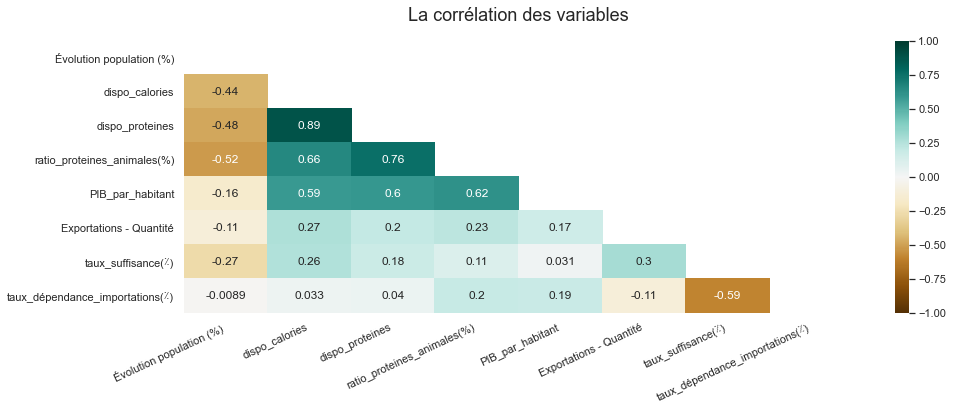

In [40]:
plt.figure(figsize=(15,5))

mask = np.zeros_like(df_clus.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_clus.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.xticks(rotation=25, ha='right')
plt.title('La corr√©lation des variables',  fontsize=18, pad=20)
plt.savefig('exports/La corr√©lation des variables.')
plt.show()

# Observations

D'apr√®s le tableau de corr√©lation color√© ci-dessus, on peut constater une corr√©lation positive  forte entre la disponibilit√© alimentaire en prot√©ine par personnes et celle en kcal par personne et la pourcentage de prot√©ine d'origine animale et le PIB .


Dans une moindre mesure, on retrouve √©galement une corr√©lation n√©gative entre le pourcentage d'√©volution de la population et les diff√©rents r√©gimes alimentaires des pays (prot√©ines, kcal, pourcentage de prot√©ine d'origine animale).

**Nous sommes int√©ress√©s par les pays les plus susceptibles de consommer du poulet, donc ceux ayant un fort ratio de prot√©ines animales. Les corr√©lations montrent que ces pays sont susceptibles d'avoir un fort PIB, et de grandes disponibilit√©s en prot√©ines et calories.**

# Clustering

## Classification des pays via Clustering Hi√©rarchique Ascendant (CHA)

La classification sera √©tablie sur la base des variables suivantes :

**La diff√©rence de population entre l'ann√©e 2013 et l'ann√©e 2019, exprim√©e en pourcentage;\
La proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays;\
La disponibilit√© alimentaire en grammes de prot√©ines par habitant ;\
La disponibilit√© alimentaire en Kcal par habitant.\
PIB par habitant.\
Rapport de d√©pendance √† l'importation.\
La taux suffisance(Ÿ™).**

L'√©chantillon comporte peu de variables sur la dimension dite du "R√©gime alimentaire" et et variables √©conomiques, il comporte √©galement un nombre de pays "ma√Ætrisables" qui permet de commencer par une classification hi√©rarchique. Algorithme qui a une forte complexit√© algorithmique en temps et en espace, le clustering hi√©rarchique est recommand√© pour les petits √©chantillons.



Le clustering permet de regrouper des individus similaires, c'est-√†-dire qu'il va partitionner l'ensemble des individus. On cherche donc √† ce que les groupes soient :

    **Resserr√©s sur eux-m√™mes : deux points qui sont proches devraient appartenir au m√™me groupe.
  
    **Loin les uns des autres, c‚Äôest-√†-dire qu‚Äôils soient fortement diff√©renci√©s.

Au pr√©alable, il est n√©cessaire de centrer-r√©duire les donn√©es. C‚Äôest √† dire, recalculer chaque valeur de mani√®re √† ce que la moyenne de la variable soit √©gale √† 0 et la variance et l‚Äô√©cart-type √©galent 1. Pour une variable donn√©e, on soustrait √† chaque valeur la moyenne de la variable, puis on divise le tout par l‚Äô√©cart-type.

Ensuite, nous pouvons proc√©der √† la classification ascendante hi√©rarchique selon la m√©thode de Ward. 


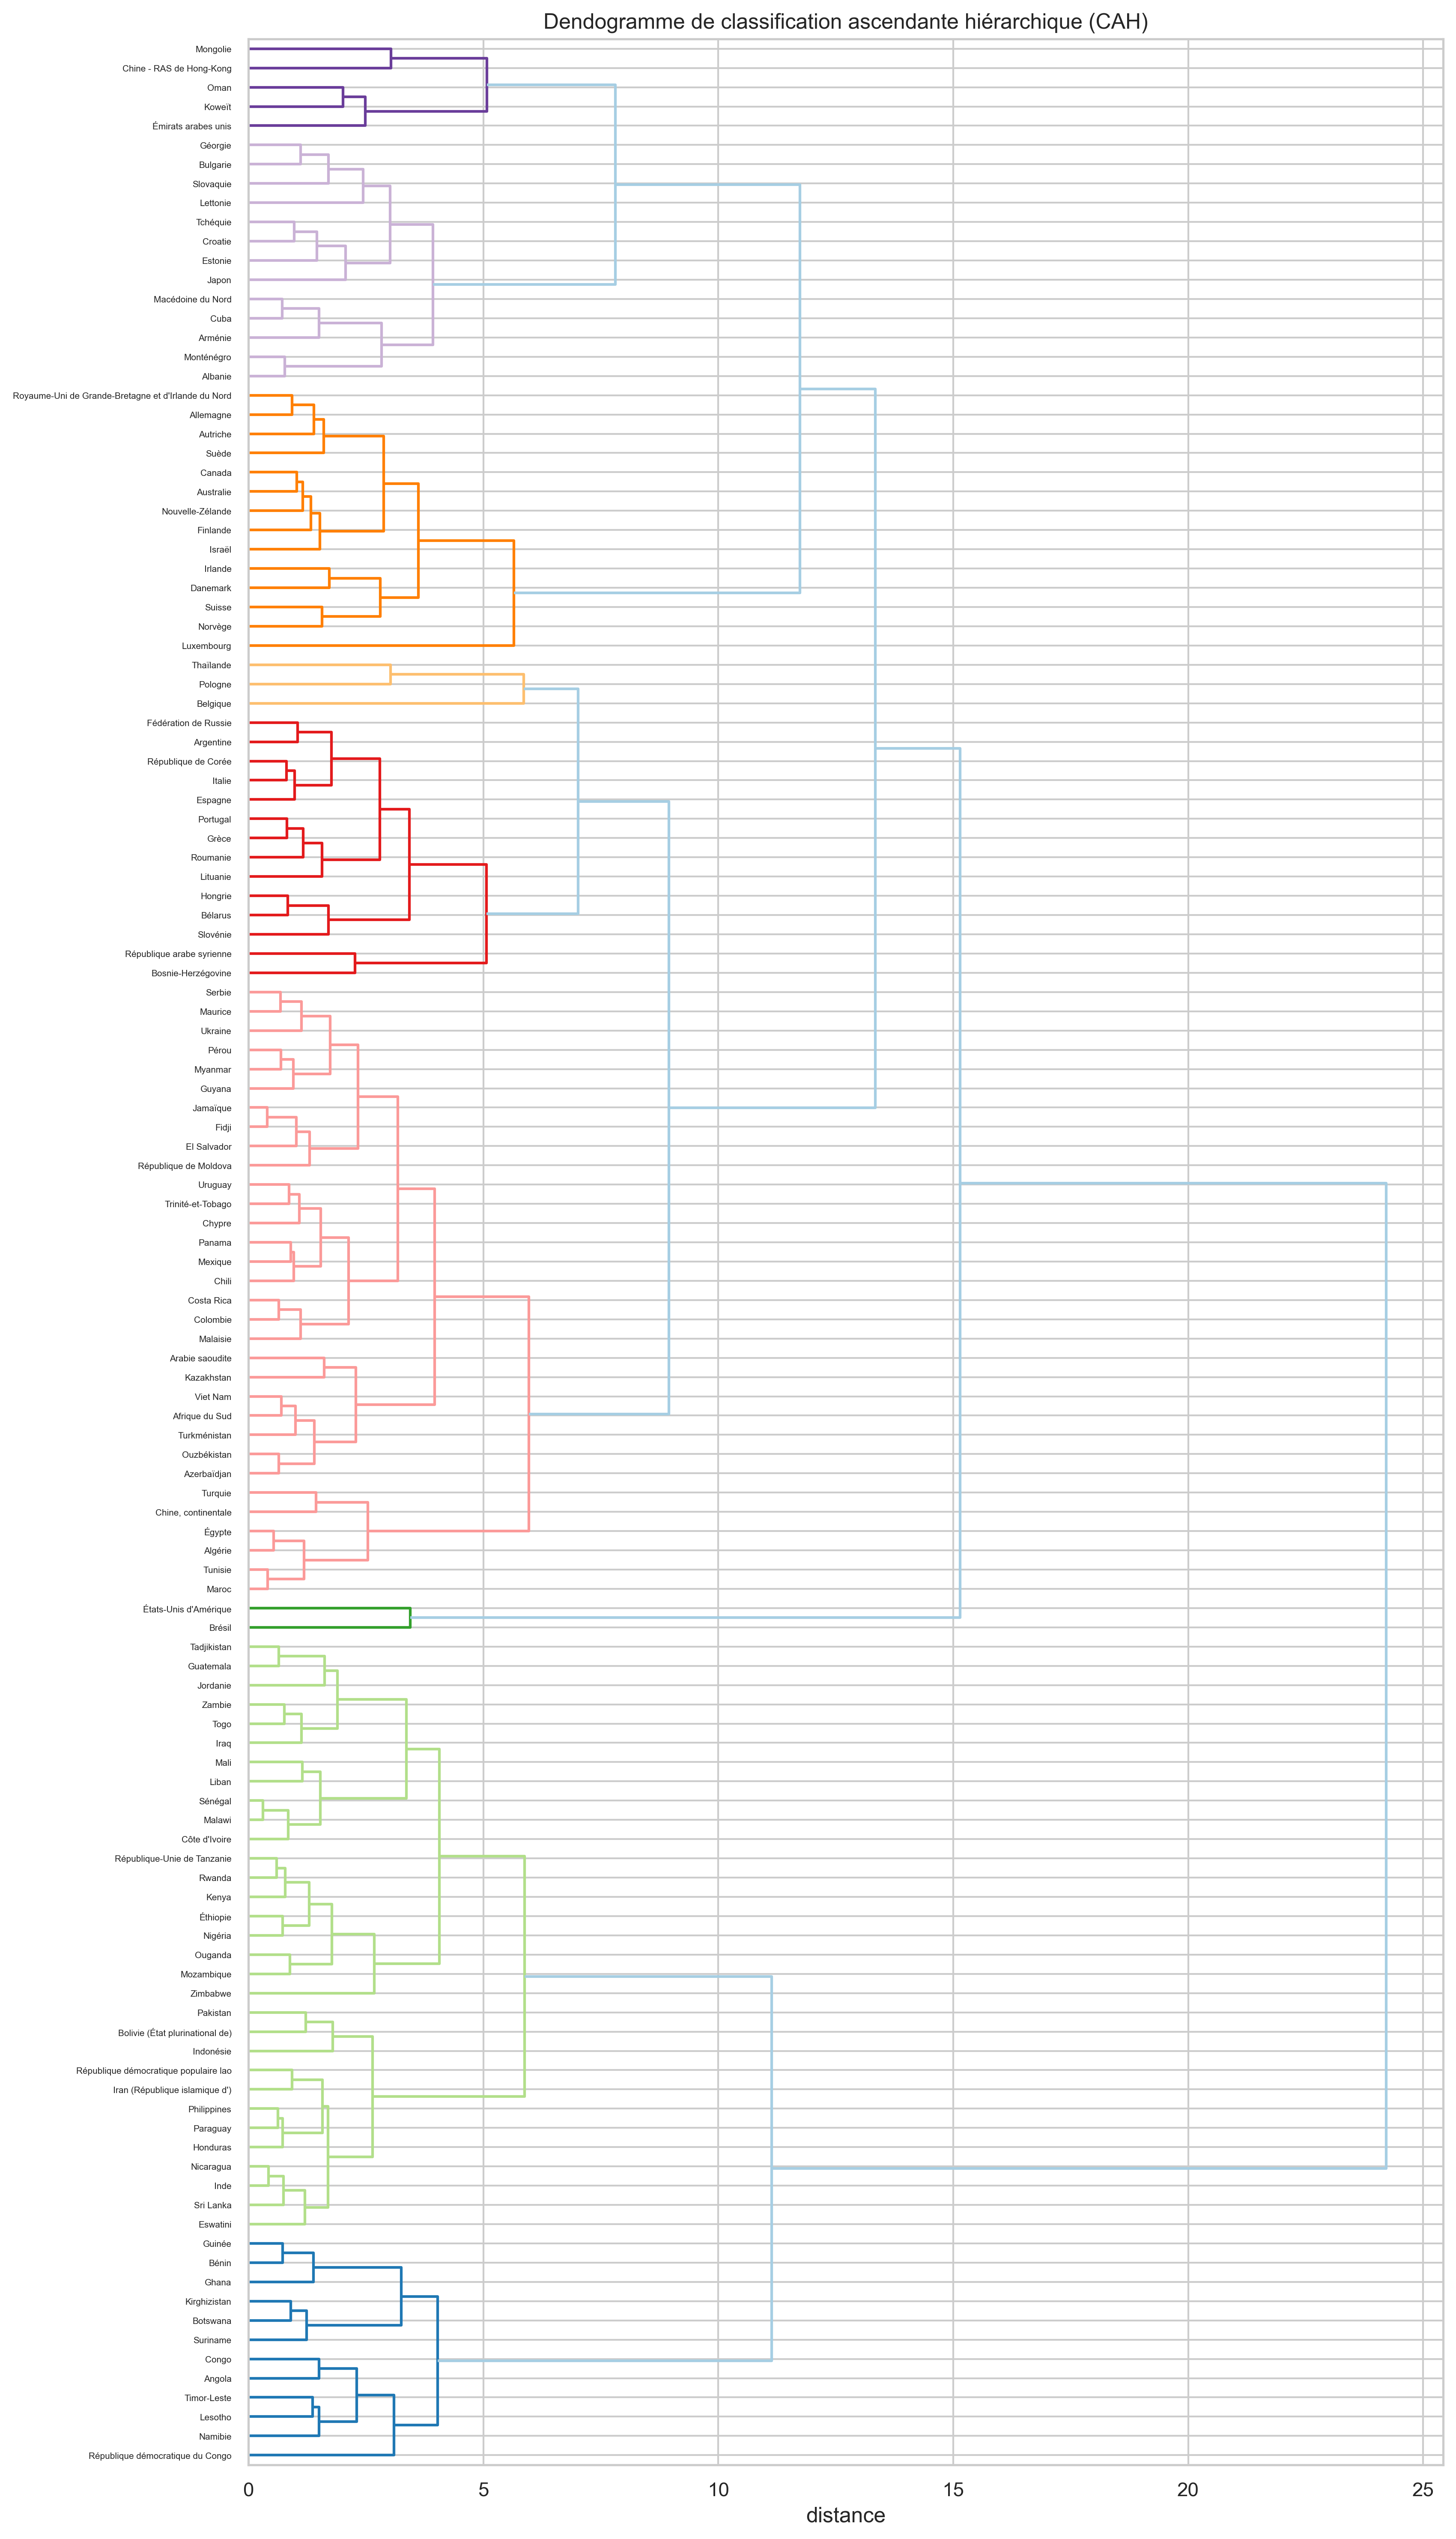

In [41]:

from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


# dans array numpy
X = df_clus.values 
#nous allons extraire les donn√©es d'expression de 172 pays  dans un tableau de donn√©es num√©riques .
 #X comporte uniquement les donn√©es  , il ne contient pas les √©tiquettes des √©chantillons.

pays = df_clus.index
 #Conservons les √©tiquettes de chaque √©chantillon  dans la variable pays.




#centering and reduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Standardisez les caract√©ristiques en supprimant la moyenne et en mettant √† l'√©chelle la variance unitaire.
#Le score standard d'un √©chantillon x est calcul√© comme suit¬†:
#z = (x - u) / s o√π
# u est la moyenne des √©chantillons d'apprentissage ou z√©ro si with_mean=False, 
# s est l'√©cart type des √©chantillons d'apprentissage ou un si with_std=False.

#X_cr =array([[-0.90652015,  0.30068128,  0.61600031, ..., -0.47817227,
        #-1.15900796,  0.84483273],
       #[ 1.29355645, -1.35075836, -1.15709131, ..., -0.68784567,
        #-0.7198978 ,  0.54941119],...,

        
#X_cr = pd.DataFrame(X_cr, index =pays, columns=df_clus.columns)

# Clustering hi√©rarchique avec librairie scipy
z=linkage(X_scaled, method='ward' ,metric='euclidean')

# Affichage du dendogramme
plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hi√©rarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    z,#Regroupement hi√©rarchique encod√© avec la matrice renvoy√©e par la fonction de linkage.
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.savefig('exports/dendogram_CAH_1.png')
plt.show()

Une fois le dendrogramme obtenu, nous pouvons choisir en combien de clusters nous pouvons diviser notre arbre. Ici, une partition en 5 clusters permet d‚Äôavoir des groupes de taille raisonnable √† analyser.

Graphiquement, on voit bien que la m√©thode de Ward a permis de minimiser les distances intra-classes √† chaque regroupement.


Essayons de caract√©riser chacun de ces clusters en regardant la valeur de leurs centro√Øde pour chaque variable. Les centro√Ødes repr√©sentent tout simplement la valeur moyenne d‚Äôune variable pour un cluster donn√©.
Diff√©rences entre les clusters :

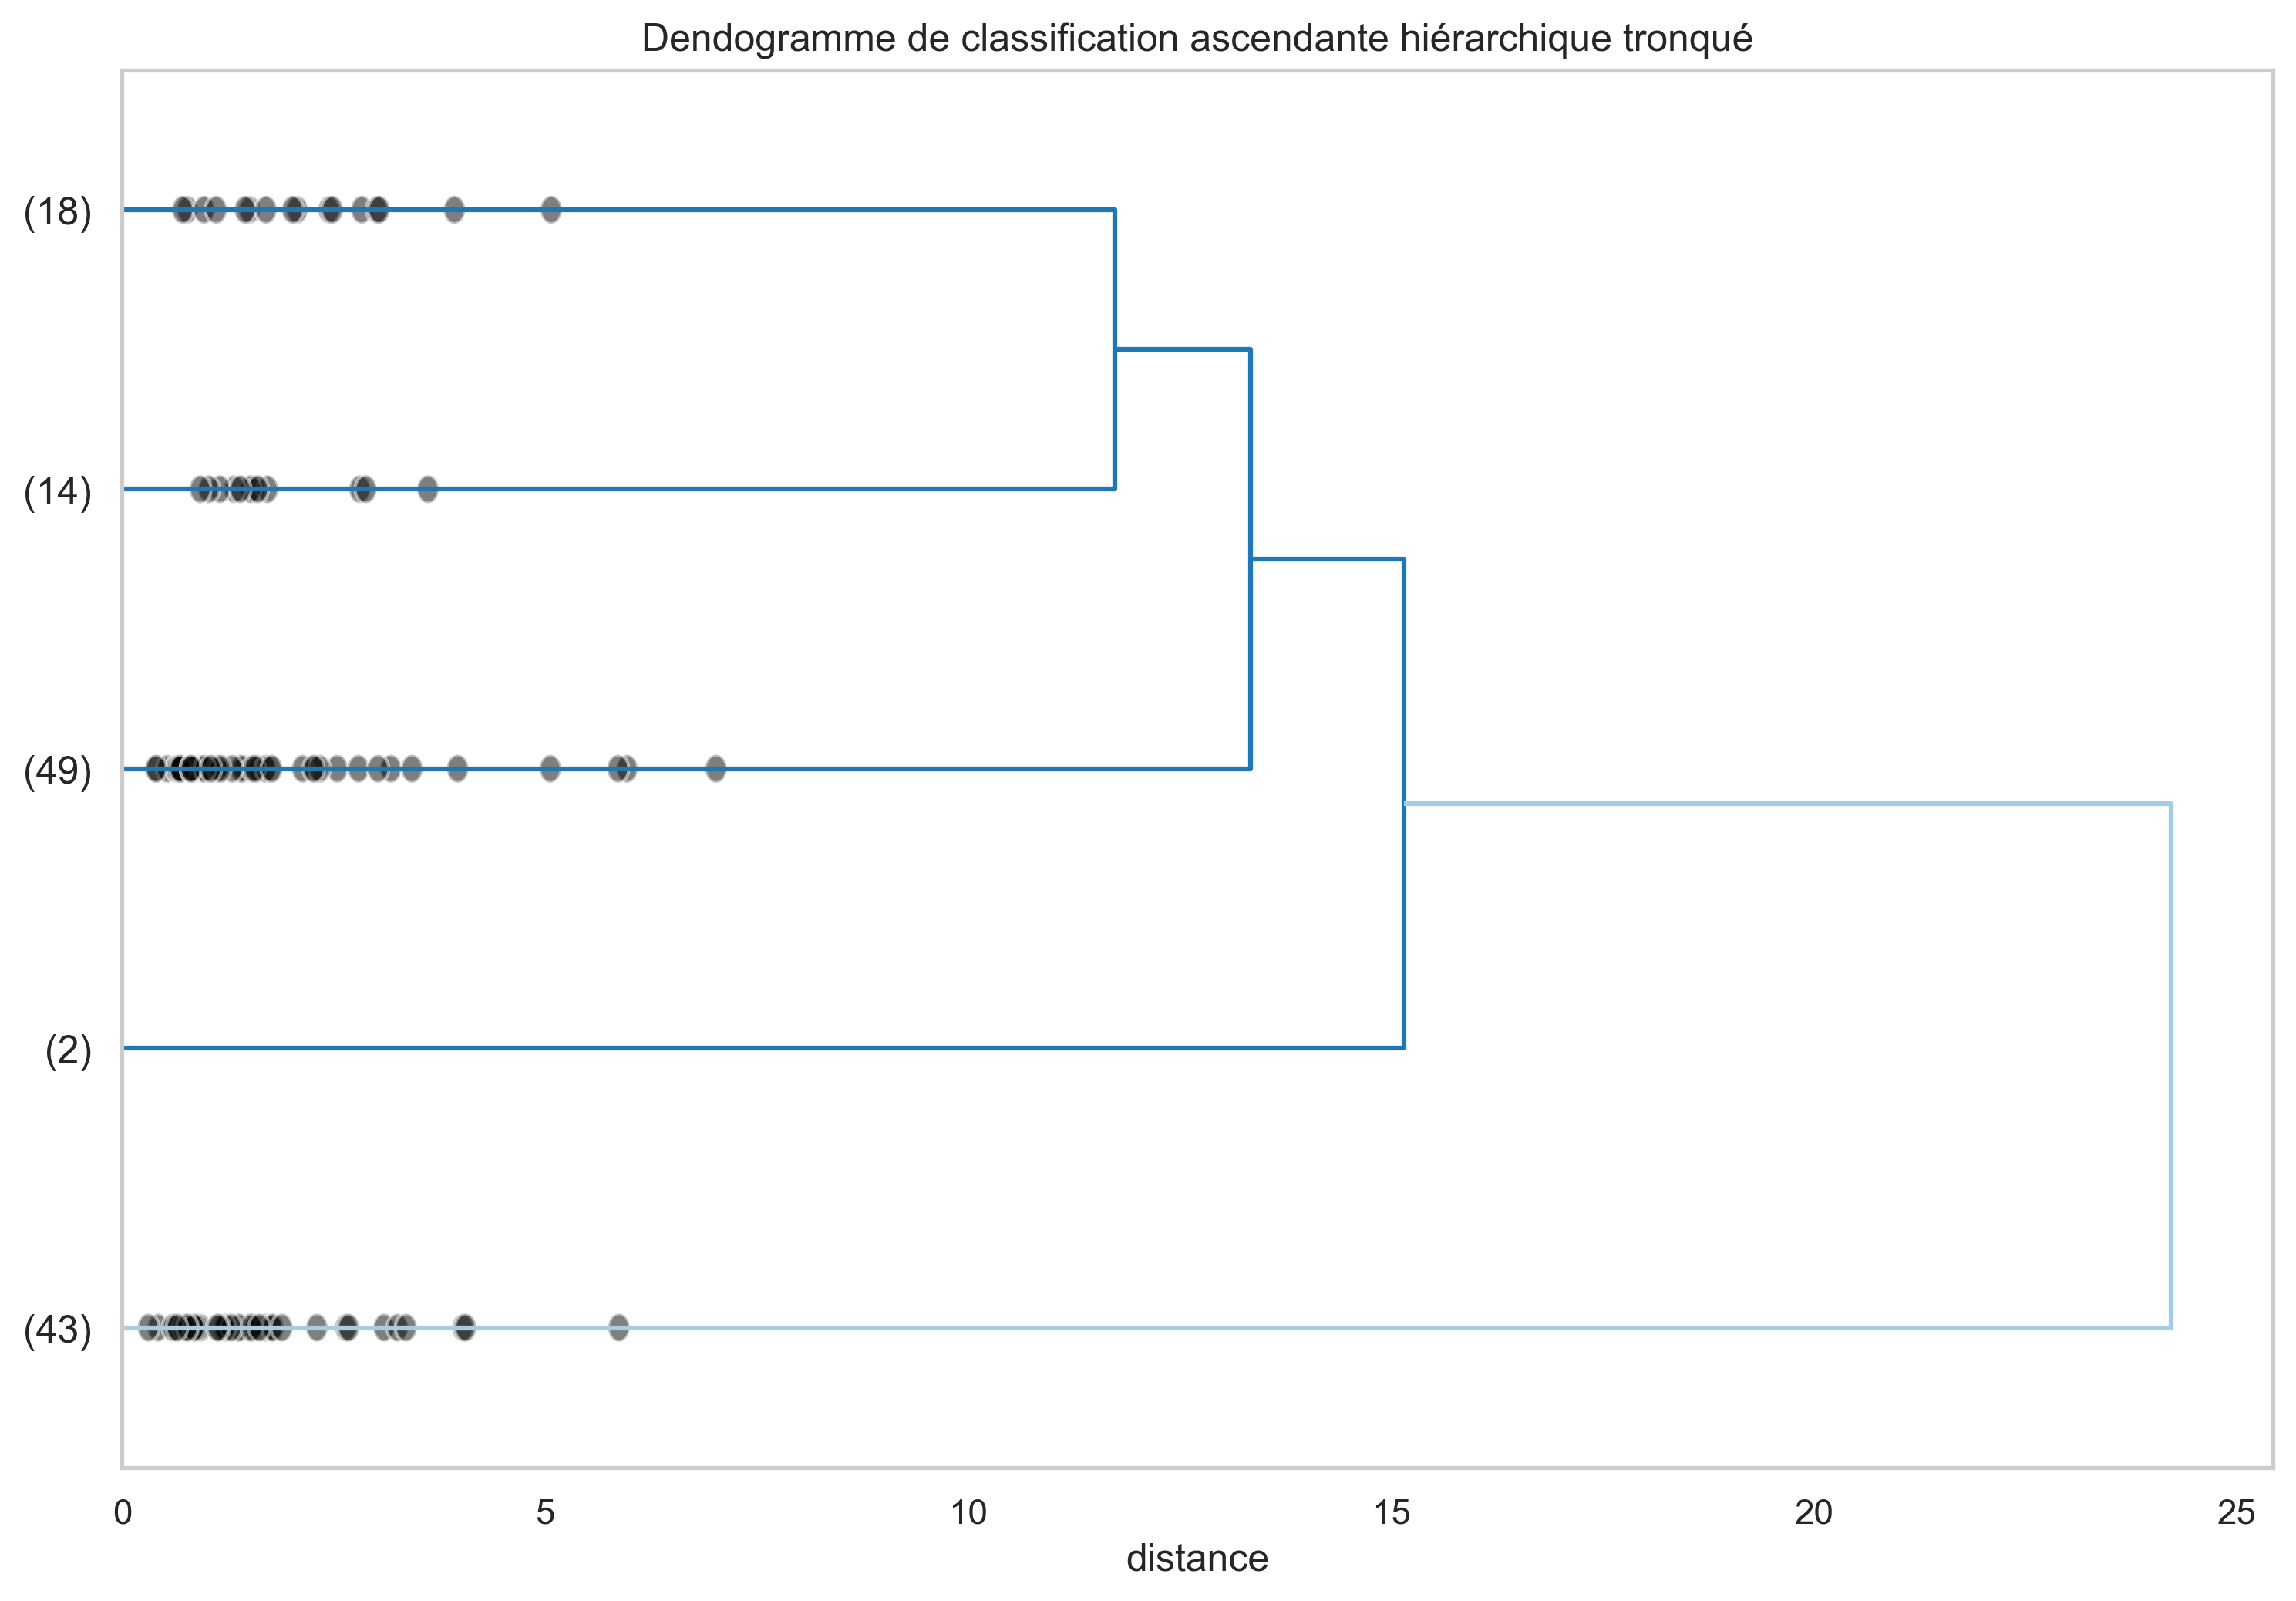

In [42]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hi√©rarchique tronqu√©')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    z,      #linkage(X_cr, method='ward' ,metric='euclidean'),
    truncate_mode='lastp', #Les p derniers clusters non singleton form√©s dans la liaison sont les seuls n≈ìuds non feuilles dans la liaison¬†; 
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,)
plt.savefig('exports/dendogram_CAH_truncated_1.png')
plt.show()



# Attribution des 5 groupes et World map de r√©partition

In [43]:
# Coupage du dendrogramme en 5 clusters avec Scipy
groupe_cah = fcluster(z, 5, criterion='maxclust')
#array([2, 1, 4, 5, 2, 2, 5, 3, 3, 2, 4,....
#pas plus de t clusters  sont form√©es.
#fcluster: formez des clusters plats √† partir du clustering hi√©rarchique d√©fini par la matrice de liaison donn√©e.

#affichage des pays et leurs groupes
df_groupage_1 = pd.DataFrame(columns=["groupe_cah","pays"])
df_groupage_1["pays"] = df_clus.index
df_groupage_1["groupe_cah"] = groupe_cah

df_groupage_1

groupe_cah        pays
0             5     Arm√©nie
1             5     Albanie
2             3     Alg√©rie
3             1      Angola
4             3   Argentine
..          ...         ...
121           1      Zambie
122           3    Belgique
123           4  Luxembourg
124           3      Serbie
125           5  Mont√©n√©gro

[126 rows x 2 columns]

In [44]:
groupe_cah

array([5, 5, 3, 1, 3, 4, 4, 1, 1, 2, 5, 3, 4, 1, 3, 3, 3, 1, 3, 5, 3, 3,
       1, 4, 3, 3, 3, 5, 3, 4, 5, 4, 3, 1, 3, 1, 1, 3, 1, 5, 3, 5, 1, 1,
       1, 1, 4, 4, 3, 1, 3, 3, 5, 1, 1, 1, 3, 5, 5, 1, 1, 1, 3, 1, 3, 1,
       3, 3, 5, 3, 1, 3, 1, 5, 4, 1, 1, 4, 1, 3, 5, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 3, 1, 3, 5, 3, 3, 1, 1, 1, 4, 4, 3, 3, 1, 3, 1, 3, 5, 3,
       3, 5, 1, 4, 3, 2, 3, 3, 3, 1, 1, 1, 3, 4, 3, 5], dtype=int32)

In [45]:
# Jointure pour ajout des groupes dans le dataframe principal
df_groupes_cah = pd.merge(df_clus, df_groupage_1, on="pays")
df_groupes_cah.to_csv('exports/groupes_cah.csv', index=False)
df_groupes_cah.sample(5)

pays  √âvolution population (%)  dispo_calories  dispo_proteines  \
117  Ouzb√©kistan                     14.91       1174935.0         36635.05   
1        Albanie                     -3.20       1218370.0         42347.30   
63        Malawi                     24.16        949000.0         25553.65   
36        Guin√©e                     21.98       1039885.0         20983.85   
40       Hongrie                     -2.84       1237715.0         32660.20   

     ratio_proteines_animales(%)  PIB_par_habitant  Exportations - Quantit√©  \
117                        42.88       1756.163496                      0.0   
1                          53.84       5303.197823                      0.0   
63                         20.87        434.772494                      0.0   
36                         20.61        967.360684                      0.0   
40                         56.17      16879.138985                    259.0   

     taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  groupe_cah  
117           80.000000                        26.250000           3  
1             35.294118                        64.705882           5  
63           100.000000                         0.000000           1  
36            31.428571                       114.285714           1  
40           171.061093                        24.437299           3

# Centro√Ødes des clusters

In [46]:
#Premi√®re comparaison des moyennes afin d'identifier le groupe de pays le plus porteur √† ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()

√âvolution population (%)  dispo_calories  dispo_proteines  \
groupe_cah                                                              
1                          19.494651    9.256570e+05     22969.789535   
2                           7.525000    1.297210e+06     38109.650000   
3                           5.291020    1.156350e+06     33872.521429   
4                           9.140714    1.263291e+06     39962.546429   
5                           5.167778    1.137644e+06     34189.550000   

            ratio_proteines_animales(%)  PIB_par_habitant  \
groupe_cah                                                  
1                             28.066279       2681.756492   
2                             62.250000      36944.501430   
3                             47.423878      12154.403787   
4                             60.448571      60583.953771   
5                             54.874444      18401.562536   

            Exportations - Quantit√©  taux_suffisance(Ÿ™)  \
groupe_cah                                                
1                          3.139535           74.379969   
2                       3912.000000          130.581503   
3                        126.693878          107.444990   
4                        116.071429           87.473367   
5                         31.666667           39.815339   

            taux_d√©pendance_importations(Ÿ™)  
groupe_cah                                   
1                                 33.424526  
2                                  0.343970  
3                                 20.291268  
4                                 36.292277  
5                                 88.646273

In [47]:
#Pr√©paration de sous-ensembles permettant de caract√©riser les groupes un √† un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 5]



In [48]:


#Pays du groupe 1 et 2 identifi√©s comme potentiellement int√©ressants

print('groupe 1')
print('----------')
print(df_groupe1_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 2')
print('----------')
print(df_groupe2_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 3')
print('----------')
print(df_groupe3_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 4')
print('----------')
print(df_groupe4_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 5')
print('----------')
print(df_groupe5_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')






groupe 1
----------
['Angola' 'Bolivie (√âtat plurinational de)' 'Botswana' 'Sri Lanka' 'Congo'
 'B√©nin' 'Ghana' 'Guatemala' 'Guin√©e' 'Honduras' 'Inde' 'Indon√©sie'
 "Iran (R√©publique islamique d')" 'Iraq' "C√¥te d'Ivoire" 'Jordanie'
 'Kirghizistan' 'Kenya' 'R√©publique d√©mocratique populaire lao' 'Liban'
 'Lesotho' 'Malawi' 'Mali' 'Mozambique' 'Namibie' 'Nicaragua' 'Nig√©ria'
 'Pakistan' 'Paraguay' 'Philippines' 'Timor-Leste' 'Zimbabwe' 'Rwanda'
 'S√©n√©gal' 'Suriname' 'Tadjikistan' 'Eswatini'
 'R√©publique-Unie de Tanzanie' 'Togo' 'Ouganda' '√âthiopie'
 'R√©publique d√©mocratique du Congo' 'Zambie']
------------------------------------------------------------
------------------------------------------------------------
groupe 2
----------
['Br√©sil' "√âtats-Unis d'Am√©rique"]
------------------------------------------------------------
------------------------------------------------------------
groupe 3
----------
['Alg√©rie' 'Argentine' 'Myanmar' 'Chili' 'Chine, continentale' '

# Description et critique des clusters

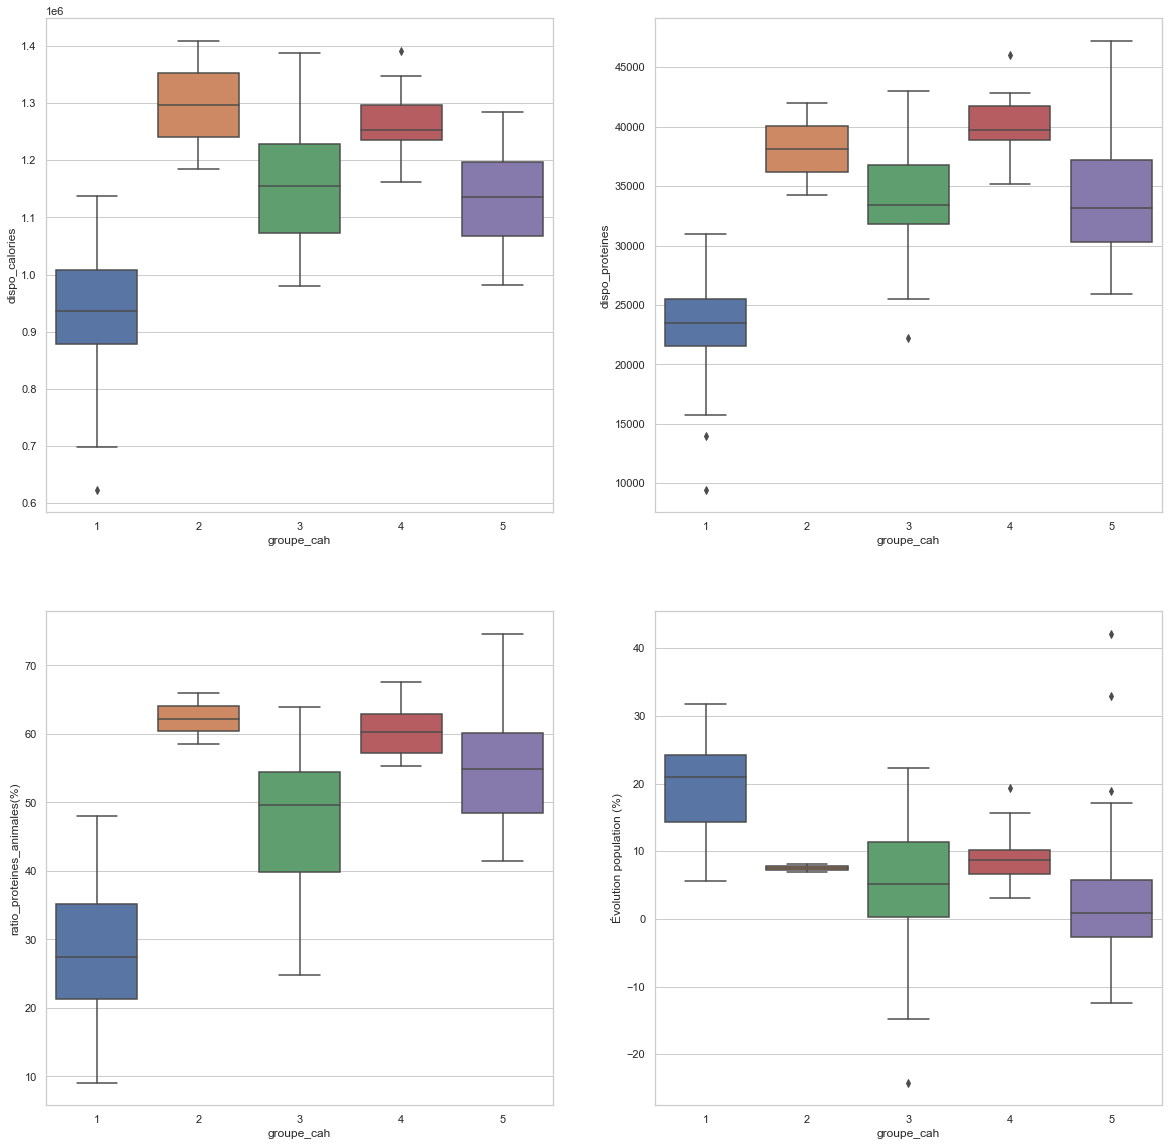

In [49]:


#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_calories')


plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='ratio_proteines_animales(%)')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='√âvolution population (%)')


plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)

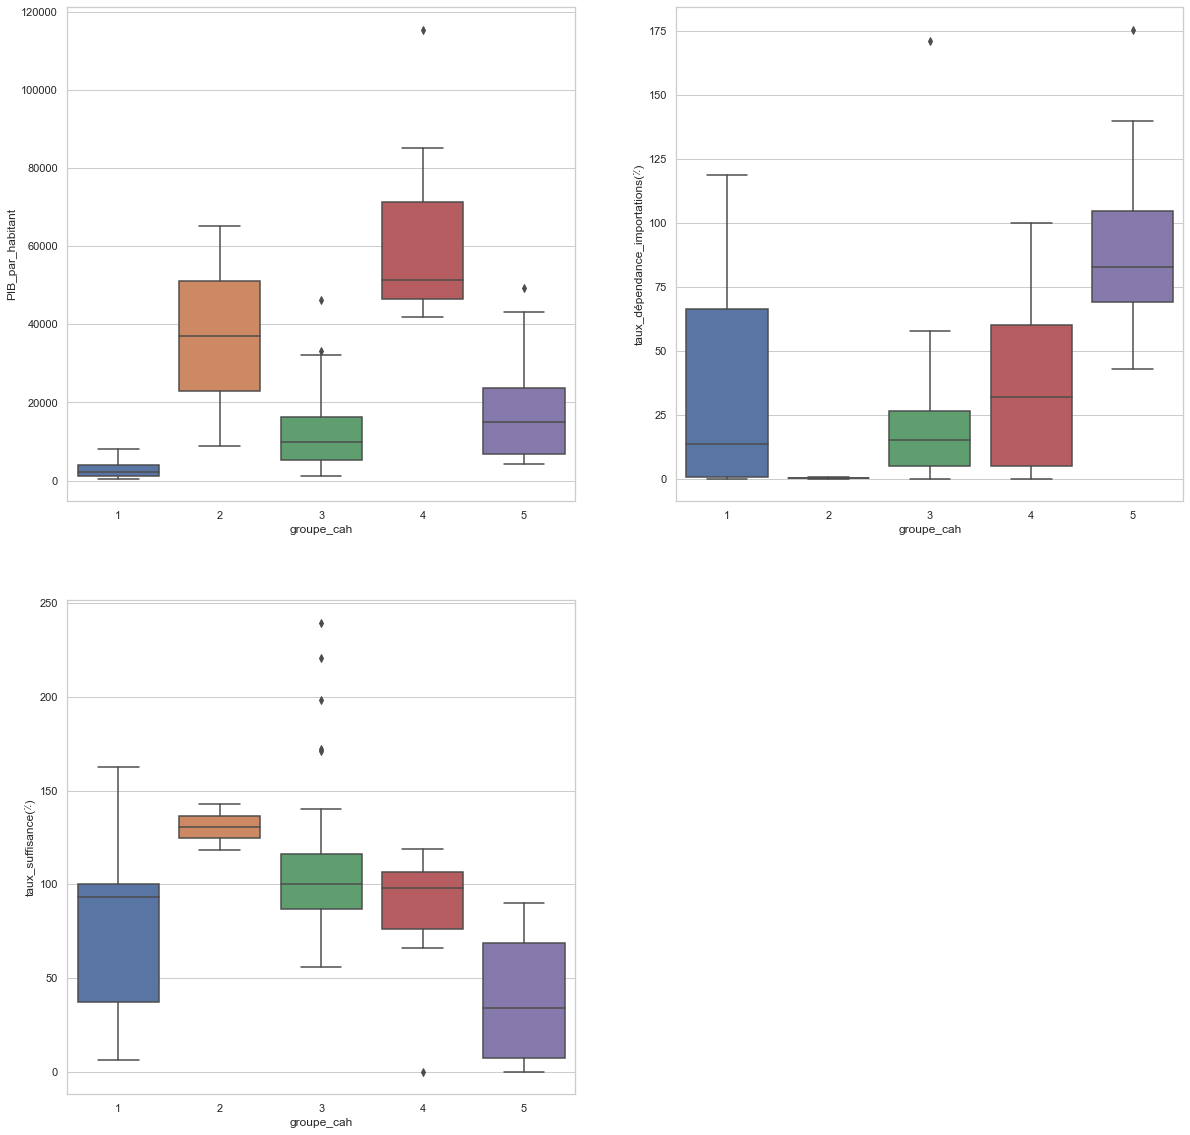

In [50]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='PIB_par_habitant')


plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_d√©pendance_importations(Ÿ™)')


plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_suffisance(Ÿ™)')


plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)

In [51]:
df_select_pays_cah = df_groupes_cah[df_groupes_cah["groupe_cah"].isin([4,5]) == True]

df_select_pays_cah.to_csv('exports/df_select_pays_cah.csv', index=False)
df_select_pays_cah.shape
df_select_pays_cah

pays  \
0                                              Arm√©nie   
1                                              Albanie   
5                                            Australie   
6                                             Autriche   
10                                            Bulgarie   
12                                              Canada   
19                                                Cuba   
23                                            Danemark   
27                                             Estonie   
29                                            Finlande   
30                                             G√©orgie   
31                                           Allemagne   
39                            Chine - RAS de Hong-Kong   
41                                             Croatie   
46                                             Irlande   
47                                              Isra√´l   
52                                               Japon   
57                                              Kowe√Øt   
58                                            Lettonie   
68                                            Mongolie   
73                                   Mac√©doine du Nord   
74                                    Nouvelle-Z√©lande   
77                                             Norv√®ge   
80                                            Tch√©quie   
94                                           Slovaquie   
100                                              Su√®de   
101                                             Suisse   
108                                               Oman   
111                                √âmirats arabes unis   
113  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
123                                         Luxembourg   
125                                         Mont√©n√©gro   

     √âvolution population (%)  dispo_calories  dispo_proteines  \
0                        2.35       1103030.0         34415.85   
1                       -3.20       1218370.0         42347.30   
5                       13.70       1247205.0         39398.10   
6                        6.50       1347215.0         39766.75   
10                      -6.76       1041710.0         30017.60   
12                       9.80       1291735.0         39620.75   
19                       0.94       1231875.0         30145.35   
23                       4.25       1248665.0         42113.70   
27                      -0.79       1155955.0         37357.75   
29                       3.43       1211800.0         42876.55   
30                      -3.07       1043900.0         28875.15   
31                       3.13       1299035.0         38047.60   
39                       6.88       1181140.0         47249.25   
41                      -5.11       1141720.0         34131.15   
46                       7.95       1391015.0         40533.25   
47                      15.60       1298670.0         46026.50   
52                      -1.34        982215.0         32127.30   
57                      32.95       1258885.0         36872.30   
58                     -12.48       1187345.0         34499.80   
68                      17.10       1051200.0         37865.10   
73                       0.69       1129675.0         30758.55   
74                       9.61       1178220.0         35204.25   
77                      10.26       1258885.0         42442.20   
80                       1.88       1199390.0         31671.05   
94                       1.02       1063610.0         25940.55   
100                      7.21       1162160.0         39456.50   
101                     10.21       1233335.0         35463.40   
108                     42.19       1077115.0         30904.55   
111                     18.97       1125660.0         29356.95   
113                      6.96       1239175.0         38759.35   
123                     19.36       1278960.0         39766.75   
125       

In [143]:
df_select_pays_cah.shape

(26, 9)

En conclusion pour cette premi√®re division,26 pays deviendraient vraisemblablement une cible appropri√©e pour l'entreprise. La demande sera pr√©sente dans ces pays.
Appliquons une autre m√©thode, celle des K-Means, afin de pouvoir comparer cette premi√®re s√©lection.

# Application de l'algorithme du K-Means


Le clustering K-Means est une m√©thode de clustering simple mais puissante qui cr√©e ùëò segments distincts des donn√©es o√π la variation au sein des clusters est aussi petite que possible. Pour trouver le nombre optimal de clusters, je vais essayer diff√©rentes valeurs de ùëò et calculer l'inertie, ou score de distorsion, pour chaque mod√®le.
 L'inertie mesure la similarit√© du cluster en calculant la distance totale entre les points de donn√©es et leur centre de cluster le plus proche. Les clusters avec des observations similaires ont tendance √† avoir des distances plus petites entre eux et un score de distorsion plus faible dans l'ensemble.

## La m√©thode de coude nous aidera pour identifier les clusters.


‚Ä¢Nous choisissons 'K' manuellement, par visualisation.

‚Ä¢ Calculer les distances entre les points d'un cluster (With-in Cluster Sum of Squares "WCSS").

‚Ä¢ Si nous minimisons 'WCSS', nous avons atteint la solution de clustering parfaite.


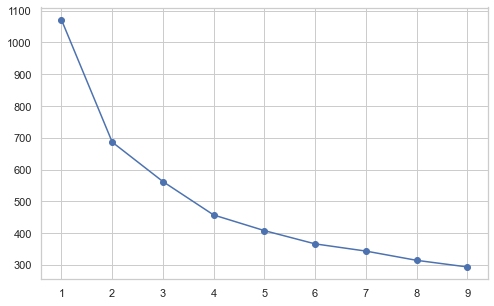

In [50]:
from sklearn.cluster import KMeans
from sklearn import cluster


K=range(1,10)
k_means = []
#On fait une boucle de 2 √† 9 pour tester toutes ces possibili√©ts
for k in K:
    #pour chaque k, on cr√©e un mod√®le et on l‚Äôajuste
    km=KMeans(n_clusters=k,init="k-means++").fit(X_scaled)
     #on stocke l‚Äôinertie associ√©e
    k_means.append(km.inertia_)


#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), k_means, marker='o')
plt.show()

In [51]:
mycenters = pd.DataFrame({'groupe_km' : K, 'WSS' : k_means})
mycenters

groupe_km          WSS
0          1  1071.000000
1          2   686.201480
2          3   561.990553
3          4   456.848522
4          5   407.675923
5          6   365.913729
6          7   343.269342
7          8   314.167165
8          9   293.317941

Id√©alement, pour optimiser et ne pas perdre trop d'informations, il est conseill√© de choisir k = 5 .
 Un clustering  en 5 permettra de de comparer le partitionnement avec les groupes de la classification hi√©rarchique. Il est pertinent de comparer les deux m√©thodes sur le m√™me nombre de clusters.



In [52]:

#Clustering K-Means en 5 clusters
km = cluster.KMeans(n_clusters=5)
km.fit(X_scaled)
#R√©cup√©ration des clusters attribu√©s √† chaque individu (classes d'appartenance)
clusters_km = km.labels_
clusters_km



array([4, 0, 4, 3, 0, 3, 2, 2, 1, 3, 0, 3, 0, 4, 3, 1, 1, 2, 0, 0, 1, 1,
       3, 3, 3, 1, 0, 3, 4, 4, 3, 0, 2, 3, 3, 3, 3, 3, 4, 3, 2, 4, 0, 0,
       2, 3, 0, 4, 1, 0, 3, 0, 1, 4, 3, 4, 1, 3, 3, 0, 2, 2, 2, 1, 4, 3,
       4, 1, 0, 1, 1, 2, 2, 4, 1, 1, 0, 0, 3, 4, 2, 1, 1, 3, 1, 0, 3, 3,
       4, 3, 1, 3, 0, 1, 4, 2, 1, 1, 1, 2, 1, 3, 4, 0, 3, 3, 1, 3, 2, 0,
       0, 1, 3, 1, 3, 3, 1, 0, 3, 4, 3, 2, 0, 1, 1, 2, 2, 3, 3, 1, 3, 1,
       3, 0, 3, 3, 4, 1, 2, 3, 2, 1, 3, 3, 3, 1, 1, 0, 1, 2, 2, 3, 4],
      dtype=int32)

On obtient donc un tableau de 5 lignes et 7 colonnes, pourquoi ?
Nous avons cinq groupes et sept variables.
**Pour r√©duire les dimensions, nous avons besoin de pca**

# Visualisation des clusters en ACP pour la projection des donn√©es


Le principe de **la r√©duction de dimension** est de r√©duire la complexit√© superflue d'un dataset en projetant ses donn√©es dans un espace de plus petite dimension .

Le principe  de **ACP** est de projeter nos donn√©es sur des axes appel√©s Composantes Principales, en cherchant √† minimiser la distance entre nos points et leur projections. De cette mani√®re on r√©duit la dimension pr√©servant au maximum la variance de nos donn√©es. Pour **Pr√©server un maximum de variance pour optenir la projection qu'il soit la plus fid√®le possible √† nos donn√©es.**
 
 Analyse Pour trouver les axes de projection (xp): 
 Pour faire √ßa dans point de vue math√©matique on
 1. On calcule la matrice de covariance des donn√©es 
 2. On d√©termine les vecteurs propres de cette matrice : ce sont les Composantes Principales 
 3. (On projette les donn√©es sur ces axes)
 


 
**L'ACP (Analyse en Composante Principale) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appr√©hender le "comportement" des diff√©rents groupes.**

PCA est un transformer ! 
1. D√©finir le nombre de composantes 
2. Transformer les donn√©es avec fit transform()

Il y a deux cas possibles pour choisir le nombre de composantes sur lesquels projeter nos donn√©es? et bien :
1. Celui dans lequel vous cherchez √† visualiser vos donn√©es dans un espace de 2d ou 3D ,pour √ßa c'est tr√®s simple, le nombre de composants doit √™tre √©gale √† deux ou trois
2. Celui dans lequel vous cherchez √† compresser vos donn√©es pour acc√©l√©rer l'apprentissage de la machine sur des taches de classification ou de r√©gression, pour √ßa il faut choisir le nombre de composantes de telle sorte √† pr√©server entre 95 et 99 % de la variance de vos donn√©es.


L‚Äôenjeu d‚Äôune ACP est de trouver le meilleur plan de projection ayant la plus grande inertie, c‚Äôest √† dire limitant le plus la perte d‚Äôinformation originelle. Les 7 variables seront synth√©tis√©es en de nouvelles variables : PC1, PC2, etc...

Comme pr√©c√©demment, une ACP ne peut se faire que si les donn√©es sont centr√©es et r√©duites (transformation pour que moyenne = 0, √©cart-type = 1).

### D√©finir le nombre de composantes 

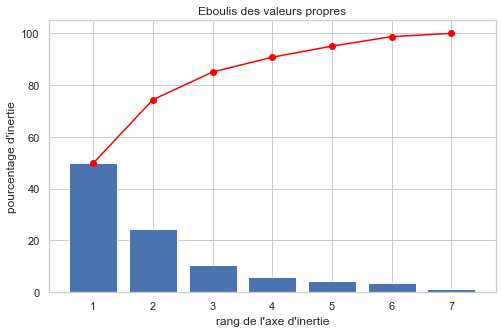

[ 49.88630268  74.40480868  85.08814597  90.81243941  95.08681732
  98.74761217 100.        ]


In [53]:
import pca as pca
from sklearn import decomposition

# Affichage du clustering par projection des individus sur les 2 plans factoriels.
pca = decomposition.PCA().fit(X_scaled) #sklearn
X_projected = pca.transform(X_scaled)


#nous allons examiner quel est le pourcentage de variance pr√©server pour chacune de nos composantes.
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')   
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig("exports/Eboulis des valeurs propres.png")

plt.show()

#Pourcentage de variance expliqu√©e par les composantes principales √† l'aide de .explained_variance_ratio_
print(scree.cumsum())





Environ 75 % de la variance des donn√©es s'explique par ces deux premi√®res composantes.
La m√©thode du coude pr√©cise une forte repr√©sentation de nos variables sur les deux premi√®res composantes principales, le premier axe factoriel.


# ACP - Cercle des corr√©lations

In [54]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            #fig, ax = plt.subplots(figsize=(12,(n_comp*2)))
            #ax.set_aspect('equal', adjustable='box')
            fig=plt.figure(figsize=(12,12))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box')

            # d√©termination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            else :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
        
            # affichage des fl√®ches
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # d√©finition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqu√©
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corr√©lations (F{} et F{})".format(d1+1, d2+1))
            plt.savefig("exports/Cercle des corr√©lations (F1 et F2).png")

            plt.show(block=False)

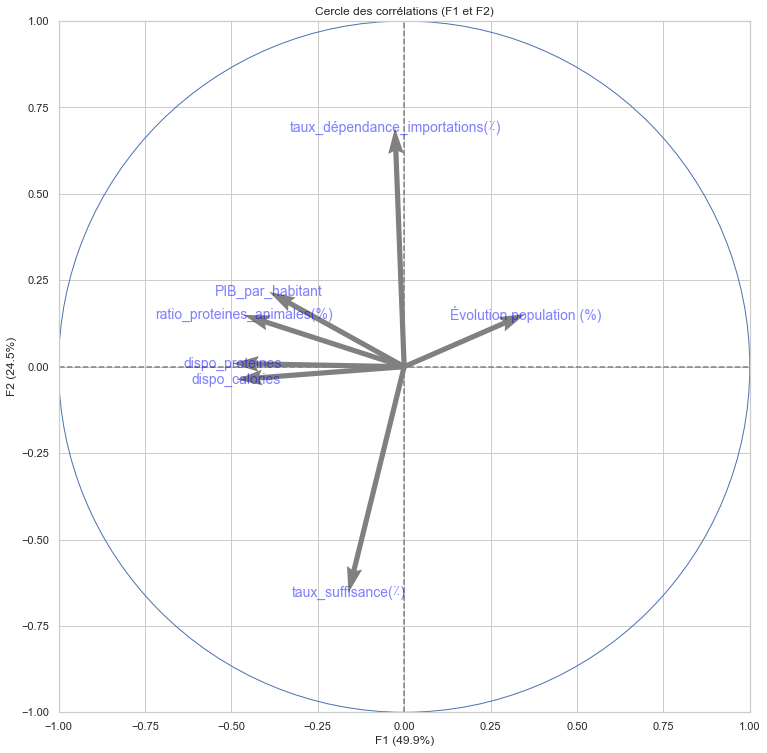

In [55]:
pcs = pca.components_
cerle_corr(pcs, 4, pca, [(0,1)], labels = np.array(df_clus.columns))

Dans notre √©tude, le premier plan factoriel de l‚ÄôACP a permis de conserver 75 % de l‚Äôinformation totale.

Ici, l‚Äôaxe PC2 refl√®te bien le taux de d√©pendance aux importations et le taux d‚Äôautosuffisance. Plus la valeur de l‚Äôaxe 2 est positive, et plus le pays est importateur. Au contraire, plus les valeurs sont n√©gatives, et plus le pays est autosuffisant avec sa production de viande de volailles et importe peu.

De m√™me, l'axe PC1 est une combinaison de la disponibilit√© totale de prot√©ines et de calories, du PIB, de la proportion de prot√©ines animales et de l'√©volution de la population.

Plus la forte croissance d√©mographique d'un pays est importante, plus sa valeur positive sur l'axe PC1 est √©lev√©e.

√Ä l'inverse, plus la valeur de l'axe PC1 est n√©gative, plus le PIB du pays est √©lev√©, plus la consommation de prot√©ines animales et la disponibilit√© alimentaire de prot√©ines et de calories sont √©lev√©es.
La prot√©ine L est la variable qui contribue le plus √† l'axe 1.

Enfin, il existe une certaine relation entre les variables du PIB, la proportion de prot√©ines animales et la disponibilit√© de prot√©ines totales et de calories.


On peut d'ailleurs calculer les valeurs de ces variables synth√©tiques F1 et F2 qui pourraient remplacer les autres variables :



In [56]:
X_projected

array([[-0.83309518,  1.44335762, -1.29818808, ..., -0.46053768,
        -0.2576511 ,  0.05195511],
       [ 2.69797624,  0.89730533,  0.25384579, ...,  0.28864918,
         0.20985637,  0.24145512],
       [-1.84654041,  0.90710747, -1.37119198, ..., -0.32586826,
         0.08362984,  0.4210577 ],
       ...,
       [-3.36674258,  3.58642842,  2.8560993 , ..., -0.56468404,
         1.52688994, -0.0383078 ],
       [-0.76916016, -0.76814735, -1.15687201, ..., -0.52900622,
         0.00482958,  0.1115594 ],
       [-2.08924856,  1.06435542, -1.02357145, ..., -0.19630919,
        -0.25544654, -0.03449507]])

In [57]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles √† l'interpr√©tation attendue
X_projected = pca.transform(X_scaled)

df_facto = pd.DataFrame(X_projected, index=df_clus.index, columns=["F" + str(i+1) for i in range(7)]).iloc[:, :2]
df_facto.head() #Affichage des 5 premi√®res lignes



F1        F2
pays                           
Arm√©nie     -0.833095  1.443358
Afghanistan  2.697976  0.897305
Albanie     -1.846540  0.907107
Alg√©rie     -0.106495 -1.170818
Angola       2.466037  1.798502

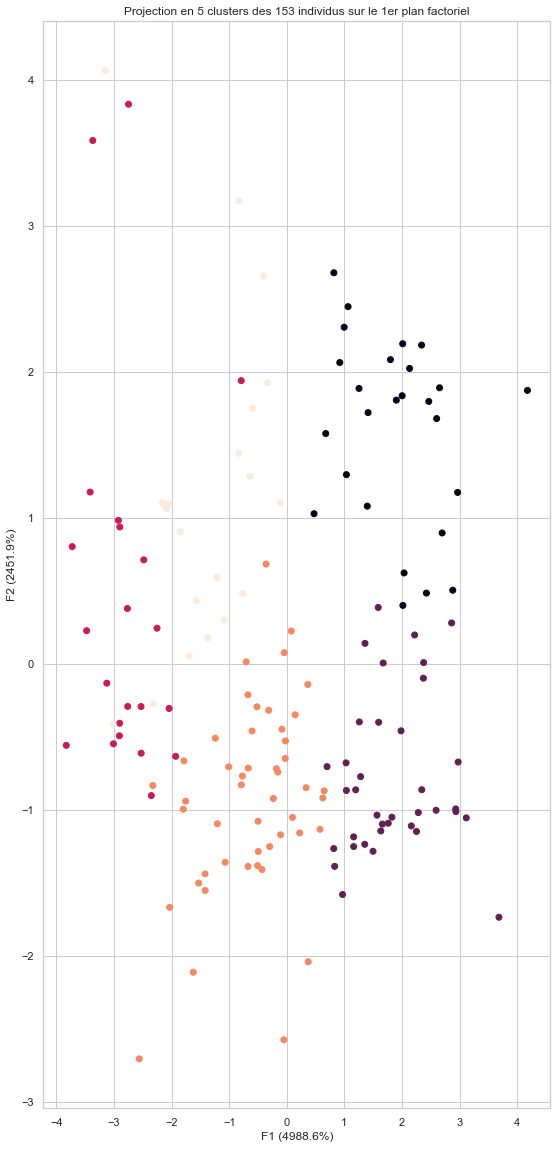

In [58]:
#pca = decomposition.PCA().fit(X_scaled) #sklearn
#X_projected = pca.transform(X_scaled)


#Coordonn√©es factorielles 
plt.figure(figsize=(20,20))
plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=km.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("exports/projection_clusters.png")
plt.show()

L'analyse sera plus fine en 5 clusters. De plus, la comparaison sera possible avec les 5 groupes identifi√©s lors du pr√©c√©dent partitionnement, le contexte nous oriente davantage vers un clustering en 5 partitions.

Maintenant, il est n√©cessaire de caract√©riser chacun de ces groupes selon nos 8 variables. La position des centro√Ødes de chacun des groupes indiquera le ou les meilleurs clusters. C'est l'avantage de proc√©der en K-Means, afin d'obtenir directement des valeurs centr√©es et r√©duites, facilitant l'analyse. ‚¨áÔ∏è

In [59]:
#correspondance avec les groupes de la CAH
pd.crosstab(groupe_cah,km.labels_)

col_0   0   1   2   3   4
row_0                    
1      23   6   0   0   0
2       0  31   0   6   0
3       0   0   2  42  17
4       0   0  17   0   0
5       3   0   3   0   3

In [60]:
df_groupes_cah['Clusterkm'] = clusters_km
gb = df_groupes_cah.groupby('Clusterkm')
nk = gb.size()
print(nk)


Clusterkm
0    26
1    37
2    22
3    48
4    20
dtype: int64


In [61]:


# Moyennes conditionnelles
mk = gb.mean()
mk

√âvolution population (%)  dispo_calories  dispo_proteines  \
Clusterkm                                                              
0                         20.871154    8.990090e+05     22017.642308   
1                         20.721351    9.042431e+05     23139.322973   
2                          8.828636    1.271560e+06     39591.052273   
3                          7.127292    1.121820e+06     31961.605208   
4                          1.018500    1.147670e+06     35044.380000   

           ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
Clusterkm                                                                      
0                            31.571154       2935.018631           23.820910   
1                            24.043784       1813.709439           91.784643   
2                            60.021818      54272.822822           92.530385   
3                            44.934583       8372.894473          106.985977   
4                            55.604000      18068.151510           51.180195   

           taux_d√©pendance_importations(Ÿ™)  groupe_cah  
Clusterkm                                               
0                                86.733775    1.461538  
1                                10.083885    1.837838  
2                                43.850349    4.045455  
3                                13.152555    2.875000  
4                                79.975633    3.300000

In [62]:
# Ajout des variables synth√©tiques F1 et F2
df_boxkm = pd.merge(df_groupes_cah, df_facto, on="pays", how="left")
df_boxkm = df_boxkm.sort_values("Clusterkm")
df_boxkm.head()

pays  √âvolution population (%)  dispo_calories  dispo_proteines  \
76  Lesotho                      6.36        799350.0         22454.80   
31    B√©nin                     24.20       1012875.0         22965.80   
42    Gabon                     27.78        961045.0         28809.45   
43   Gambie                     25.87        906295.0         22929.30   
46    Ghana                     20.54       1136610.0         22542.40   

    ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
76                        29.31       1157.536027           12.500000   
31                        20.52       1220.492825           12.396694   
42                        47.62       7773.198920            5.263158   
43                        29.37        776.444497            7.692308   
46                        23.66       2202.629207           30.136986   

    taux_d√©pendance_importations(Ÿ™)  groupe_cah  Clusterkm        F1        F2  
76                       118.750000           1          0  1.800856  2.084609  
31                        96.694215           1          0  2.003215  1.837476  
42                        94.736842           5          0  0.996762  2.306932  
43                        96.153846           1          0  2.132842  2.024523  
46                        69.863014           1          0  1.398030  1.080928

In [63]:
def boxplot_cluster_km(var):
    data_boxplot = []
    groupes_pays = df_boxkm["Clusterkm"].unique()
    
    for groupe in groupes_pays :
        subset = df_boxkm[df_boxkm.Clusterkm == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5, labels=["0", "1", "2", "3", "4"])

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title(("Distribution de " + var +" par Cluster Kmeans"), fontsize=22)
    ax1.set_ylabel(var)
    ax1.set_xlabel("Cluster")
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

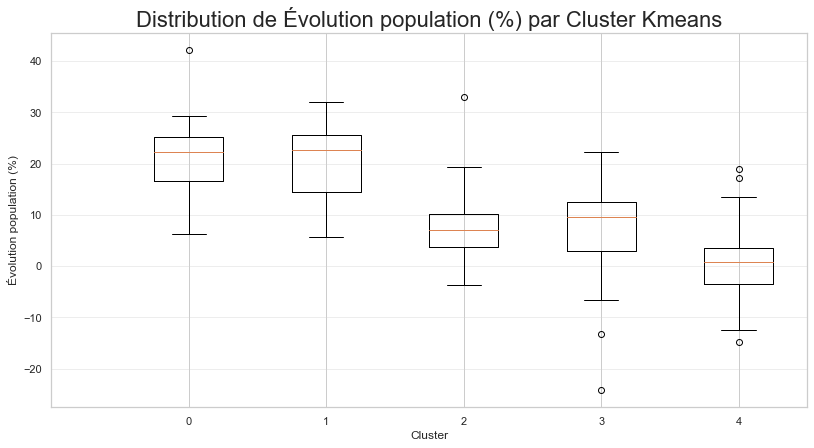

In [64]:
boxplot_cluster_km('√âvolution population (%)')

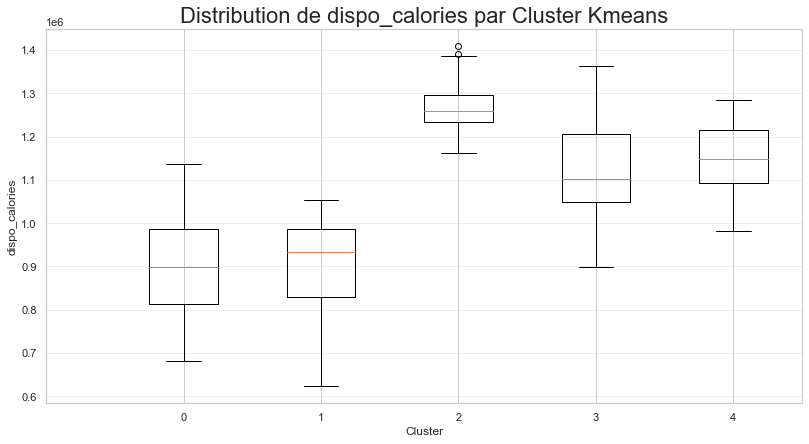

In [65]:
boxplot_cluster_km('dispo_calories')



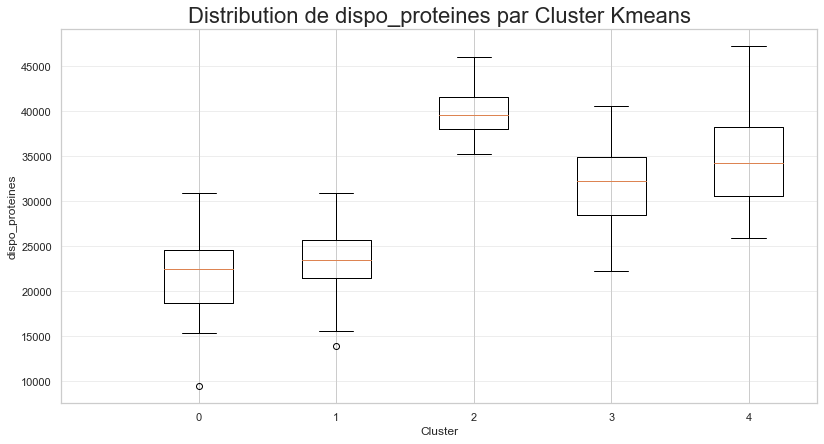

In [66]:
boxplot_cluster_km('dispo_proteines')


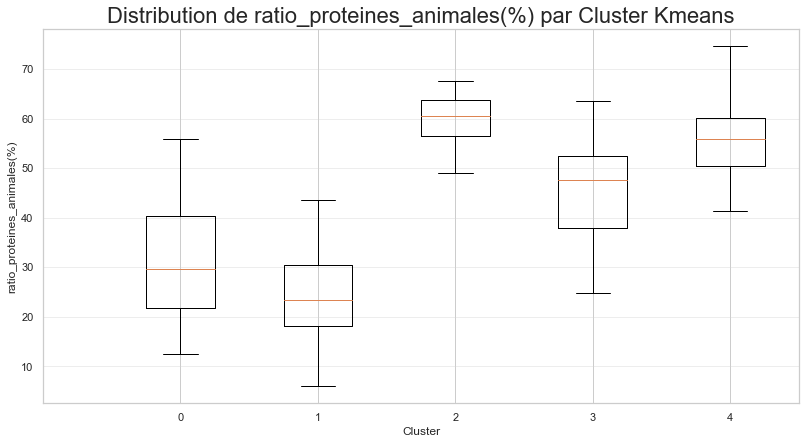

In [67]:
boxplot_cluster_km('ratio_proteines_animales(%)')


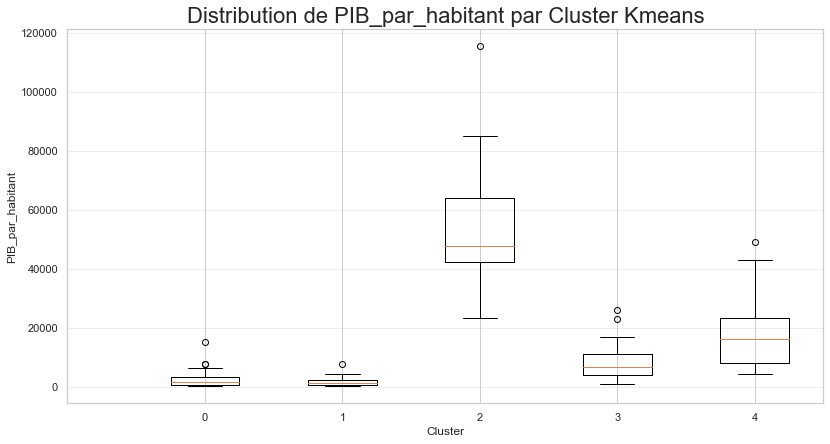

In [68]:
boxplot_cluster_km('PIB_par_habitant')


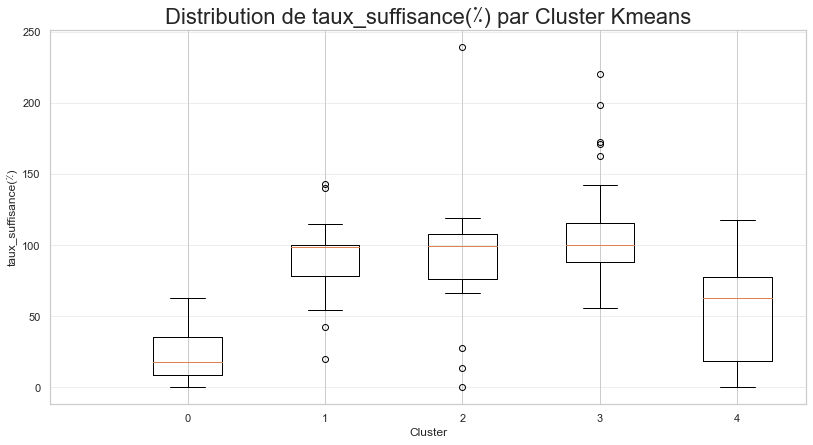

In [69]:
boxplot_cluster_km('taux_suffisance(Ÿ™)')


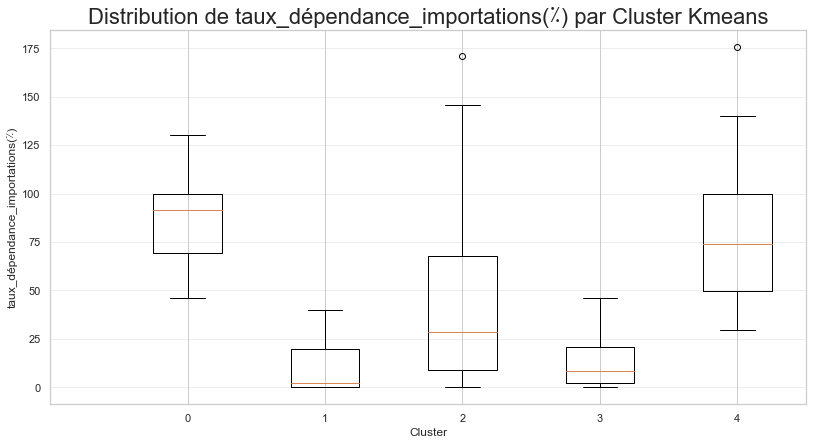

In [70]:
boxplot_cluster_km('taux_d√©pendance_importations(Ÿ™)')


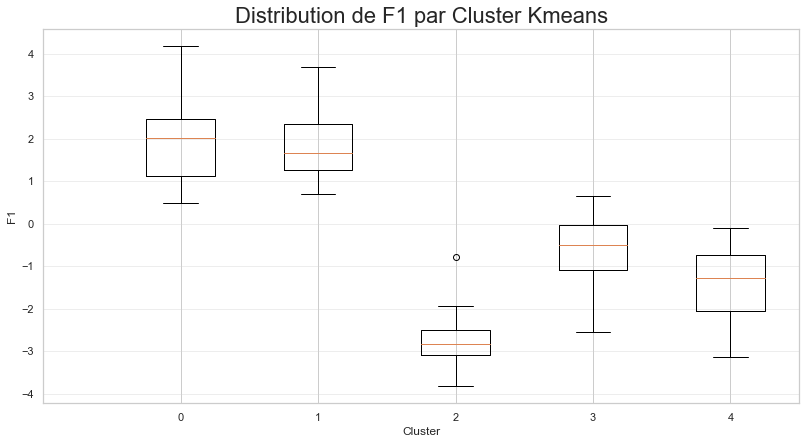

In [71]:
boxplot_cluster_km('F1')


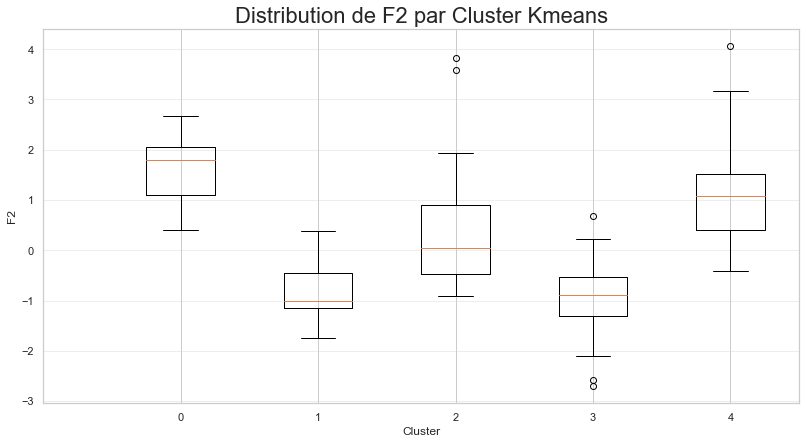

In [72]:
boxplot_cluster_km('F2')


# S√©lections des pays sur groupes Kmeans.


In [73]:
select_clusters_kmeans = df_boxkm.groupby("Clusterkm").mean().reset_index()
select_clusters_kmeans = df_boxkm[df_boxkm["F2"]>1]["Clusterkm"].unique()
select_clusters_kmeans

array([0, 2, 4], dtype=int32)

In [74]:
df_select_pays_kmeans = df_boxkm[df_boxkm["Clusterkm"].isin(select_clusters_kmeans)]
df_select_pays_kmeans

pays  √âvolution population (%)  dispo_calories  \
76             Lesotho                      6.36        799350.0   
31               B√©nin                     24.20       1012875.0   
42               Gabon                     27.78        961045.0   
43              Gambie                     25.87        906295.0   
46               Ghana                     20.54       1136610.0   
..                 ...                       ...             ...   
79            Lituanie                    -14.77       1244650.0   
88            Mongolie                     17.10       1051200.0   
94   Mac√©doine du Nord                      0.69       1129675.0   
119          Slovaquie                      1.02       1063610.0   
152         Mont√©n√©gro                      0.80       1284800.0   

     dispo_proteines  ratio_proteines_animales(%)  PIB_par_habitant  \
76          22454.80                        29.31       1157.536027   
31          22965.80                        20.52       1220.492825   
42          28809.45                        47.62       7773.198920   
43          22929.30                        29.37        776.444497   
46          22542.40                        23.66       2202.629207   
..               ...                          ...               ...   
79          42354.60                        58.50      19795.215752   
88          37865.10                        71.10       4295.235029   
94          30758.55                        43.68       6093.147690   
119         25940.55                        53.58      19255.895672   
152         40876.35                        60.25       8825.344514   

     taux_suffisance(Ÿ™)  taux_d√©pendance_importations(Ÿ™)  groupe_cah  \
76            12.500000                       118.750000           1   
31            12.396694                        96.694215           1   
42             5.263158                        94.736842           5   
43             7.692308                        96.153846           1   
46            30.136986                        69.863014           1   
..                  ...                              ...         ...   
79           117.647059                        57.647059           3   
88             0.000000                       140.000000           5   
94             2.380952                        97.619048           3   
119           73.958333                       108.333333           3   
152           40.000000                        70.000000           3   

     Clusterkm        F1        F2  
76           0  1.800856  2.084609  
31           0  2.003215  1.837476  
42           0  0.996762  2.306932  
43           0  2.132842  2.024523  
46           0  1.398030  1.080928  
..         ...       ...       ...  
79           4 -3.014143 -0.413515  
88           4 -0.823626  3.173402  
94           4 -0.333606  1.926928  
119          4 -0.637864  1.284304  
152          4 -2.089249  1.064355  

[68 rows x 12 columns]

In [75]:
df_select_pays_kmeans.shape

(68, 12)

In [76]:
df_compare_1 = pd.merge(df_select_pays_cah[['pays','groupe_cah']], df_select_pays_kmeans[['pays','Clusterkm']],
                     on='pays', how='outer')
df_compare_1

pays  groupe_cah  Clusterkm
0           Australie         4.0          2
1            Autriche         4.0          2
2              Canada         4.0          2
3            Danemark         4.0          2
4            Finlande         4.0          2
..                ...         ...        ...
63           Lettonie         NaN          4
64           Lituanie         NaN          4
65  Mac√©doine du Nord         NaN          4
66          Slovaquie         NaN          4
67         Mont√©n√©gro         NaN          4

[68 rows x 3 columns]

# Liste des pays et recommandations

In [77]:
df_select_pays_km_cah=df_compare_1.dropna()
df_select_pays_km_cah


pays  groupe_cah  Clusterkm
0                                           Australie         4.0          2
1                                            Autriche         4.0          2
2                                              Canada         4.0          2
3                                            Danemark         4.0          2
4                                            Finlande         4.0          2
5                                               Gabon         5.0          0
6                                           Allemagne         4.0          2
7                            Chine - RAS de Hong-Kong         5.0          4
8                                             Irlande         4.0          2
9                                              Isra√´l         4.0          2
10                                             Italie         4.0          2
11                                R√©publique de Cor√©e         4.0          2
12                                             Kowe√Øt         5.0          2
13                               Chine - RAS de Macao         5.0          2
14                                         Mauritanie         5.0          0
15                                           Mongolie         5.0          4
16                                   Nouvelle-Z√©lande         4.0          2
17                                            Norv√®ge         4.0          2
18                                            Espagne         4.0          2
19                                              Su√®de         4.0          2
20                                             Suisse         4.0          2
21                                               Oman         5.0          0
22                                √âmirats arabes unis         5.0          4
23  Royaume-Uni de Grande-Bretagne et d'Irlande du...         4.0          2
24                              √âtats-Unis d'Am√©rique         4.0          2
25                                         Luxembourg         5.0          2

Liste des pays et recommandations Dans un premier temps, on sugg√®re donc de cibler les pays de l'UE, pour leur proximit√© et la facilit√© des √©changes commerciaux : l'Allemagne, le Danemark, la Su√®de ,Luxembourg et le Norv√®ge.

Prudence avec le Royaume-Uni, puisqu'avec le Brexit, les √©changes commerciaux avec l'UE sont actuellement compliqu√©s. Pour autant, consid√©rant les int√©r√™ts √©conomiques mutuels, les r√©centes directives qui ont √©t√© prises pour favoriser ces √©changes sont en notre faveur.

De plus, il n'est pas pr√©f√©rable d'exporter vers l'Am√©rique et les Pays-Bas, car c'est l'un des pays les plus exportateurs de poulet au monde en plus du Br√©sil.

Dans un second temps, on pourrait √©galement cibler les pays comme Hong Kong, le Japon, √âmirats arabes unis, ainsi que le Kowe√Øt.

FAO - Poultry production - March√©s et commerce https://www.fao.org/poultry-production-products/aspects-socio-economiques/marches-et-commerce/fr/

"Le Br√©sil est le principal exportateur de viande de volaille, suivi par les √âtats-Unis et les Pays-Bas. Les principaux pays importateurs sont la Chine, le Japon, le Mexique et le Royaume-Uni."

"Les pays les moins avanc√©s sont de plus en plus d√©pendants des importations de viande de volaille. Le niveau de leurs importations est pass√© de 3 pour cent en 1961 √† environ 30 pour cent en 2013."



https://www.fao.org/poultry-production-products/production/fr/

"Les √âtats-Unis d'Am√©rique sont le plus grand producteur de viande de volaille √† l‚Äô√©chelle de la plan√®te: ils produisent en effet 17 pour cent de la production mondiale. Viennent ensuite la Chine et le Br√©sil."

"Pour r√©pondre √† la demande croissante, la production de viande de volaille mondiale a bondi, passant de 9 √† 132 millions de tonnes entre 1961 et 2019."

"En 2019, la viande de volaille repr√©sentait environ 39 pour cent de la production mondiale de viande."

"Dans les pays en d√©veloppement, environ 80 pour cent des m√©nages ruraux √©l√®vent des volailles."

# Tests statistiques
Dans votre partition, vous avez obtenu des groupes distincts. V√©rifiez donc qu'ils diff√®rent r√©ellement. Pour cela, r√©alisez les tests statistiques suivants :

un test d'ad√©quation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez d√©termin√©. Sur ces 2 clusters, testez la variable gaussienne gr√¢ce √† un test de comparaison
## Nos groupes sont-ils r√©ellement distincts?

On peut tester l‚Äôad√©quation de la 'Disponibilit√© alimentaire de prot (g/personne/jour)' √† une loi normale √† l‚Äôaide de Kolmogorov-Smirnov. Le test sera doubl√© par celui de Shapiro-Wilk.

In [78]:
import scipy.stats as st
from scipy import stats
from scipy.stats import ks_2samp

### Test d'ad√©quation de Kolmogorov-Smirnov :

### V√©rification des hypoth√®ses

**H0 = La variable suit donc  une loi normale .**

**H1 = La variable ne suit pas une loi normale.**

In [79]:
df_groupes_cah.head(1)

pays  √âvolution population (%)  dispo_calories  dispo_proteines  \
0  Arm√©nie                      2.35       1103030.0         34415.85   

   ratio_proteines_animales(%)  PIB_par_habitant  taux_suffisance(Ÿ™)  \
0                        56.06       4622.733216           21.818182   

   taux_d√©pendance_importations(Ÿ™)  groupe_cah  Clusterkm  
0                        78.181818           3          4

In [80]:
#Kolmogorov Smirnov test
stat, p= st.ks_2samp(df_groupes_cah['dispo_proteines'], 
            np.random.normal(df_groupes_cah['dispo_proteines'].mean(), 
                             df_groupes_cah['dispo_proteines'].std(ddof=0),
                             df_groupes_cah['dispo_proteines'].count()))

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interpr√©tation
alpha = 0.05
if p > alpha:
    print(' Nous pouvons accepter H0 pour des niveaux de test de 5¬†%')
else:
    print('H0 est rejet√©e √† un niveau de test de 5%')
    

Statistics=0.118, p=0.241
 Nous pouvons accepter H0 pour des niveaux de test de 5¬†%


### Test d'ad√©quation de Shapiro-Wilk :

*Recommand√© pour tester la normalit√© dans le cas de petits √©chantillons.

In [81]:
#creation of the df with only clusters 4 & 5
c4c5 = df_groupes_cah[(df_groupes_cah['groupe_cah'] == 4) | (df_groupes_cah['groupe_cah'] == 5)]

In [82]:
#conda install -c conda-forge pingouin
#Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. 

**Test de Shapiro-Wilk** : teste si un √©chantillon suit une loi normale ou non (hypoth√®se nulle : suit une loi normale, donc si p-value < 0.01, l'√©chantillon ne suit pas une loi normale). Cela permet alors d'utiliser certains tests statistiques si la r√©ponse est oui.

In [83]:
#normality of variables in c4c5
import pingouin as pg
pg.normality(c4c5, method='shapiro', alpha=0.05).drop('groupe_cah')

#normality: test de normalit√© univari√©.

W      pval  normal
√âvolution population (%)         0.877715  0.005153   False
dispo_calories                   0.952844  0.270070    True
dispo_proteines                  0.938989  0.127038    True
ratio_proteines_animales(%)      0.981259  0.899440    True
PIB_par_habitant                 0.960414  0.399750    True
taux_suffisance(Ÿ™)               0.834285  0.000716   False
taux_d√©pendance_importations(Ÿ™)  0.898618  0.014584   False
Clusterkm                        0.665128  0.000002   False

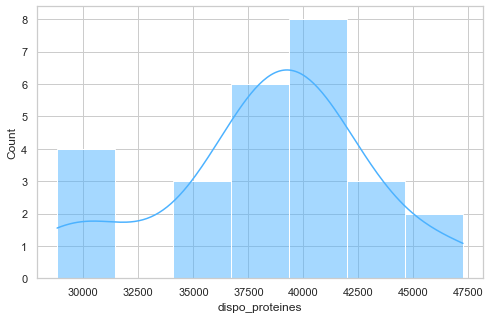

In [84]:
#histogram
sns.histplot(data=c4c5, x='dispo_proteines', kde=True, color='#4cb2ff')
plt.savefig("exports/tester la normalit√© dispo_proteines.jpg")

plt.show()

#### Disponibilit√© alimentaire √©nerg√©tique


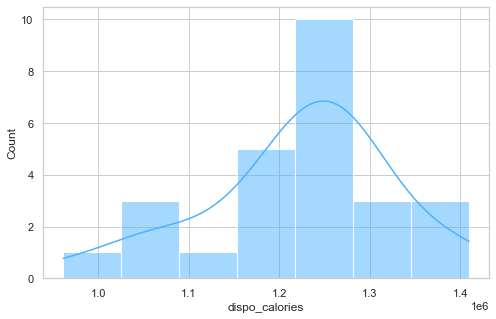

In [85]:
#histogram
sns.histplot(data=c4c5, x='dispo_calories', kde=True, color='#4cb2ff')
plt.savefig("exports/tester la normalit√© dispo_calories.jpg")
plt.show()

#### Importation de viande de volaille


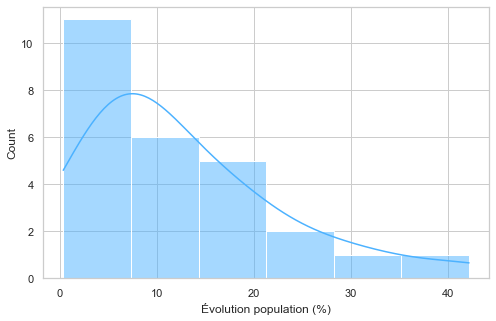

In [86]:
#histogram
sns.histplot(data=c4c5, x='√âvolution population (%)', kde=True, color='#4cb2ff')
plt.savefig("exports/tester la normalit√© √âvolution populations.jpg")

plt.show()

#### Pourcentage de prot√©ine animale


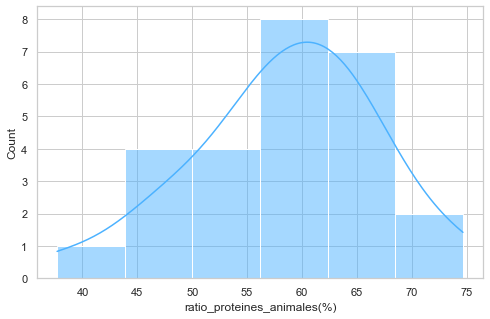

In [87]:
#histogram
sns.histplot(data=c4c5, x='ratio_proteines_animales(%)', kde=True, color='#4cb2ff')
plt.savefig("exports/tester la normalit√© ratio_pro.jpg")

plt.show()

#### Produit Int√©rieur Brut


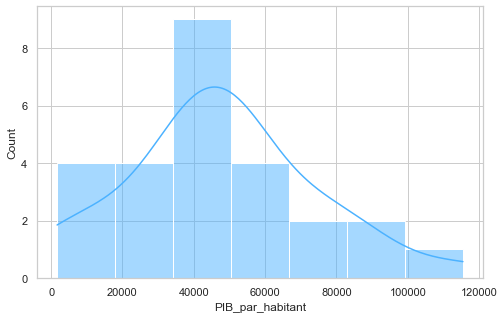

In [88]:
#histogram
sns.histplot(data=c4c5, x='PIB_par_habitant', kde=True, color='#4cb2ff')
plt.savefig("exports/tester la normalit√© PIB.jpg")

plt.show()

#### Importation de viande de volaille


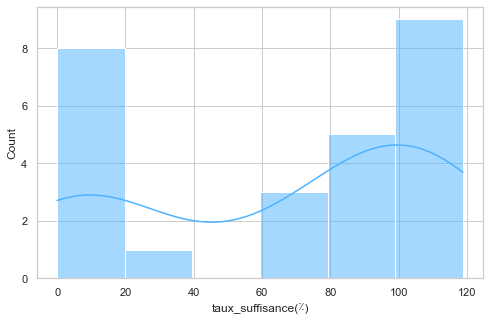

In [89]:
#histogram
sns.histplot(data=c4c5, x='taux_suffisance(Ÿ™)', kde=True, color='#4cb2ff')
plt.savefig("exports/tester la normalit√© taux_suffisance.jpg")

plt.show()


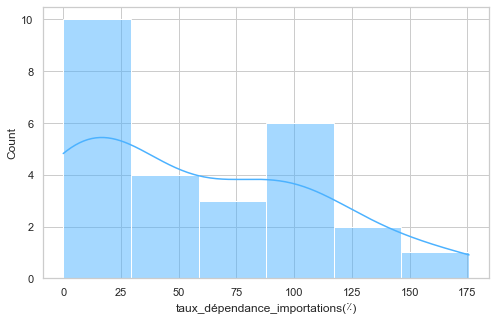

In [90]:
#histogram
sns.histplot(data=c4c5, x='taux_d√©pendance_importations(Ÿ™)', kde=True, color='#4cb2ff')
plt.savefig("exports/tester la normalit√© taux_d√©pendance_importations.jpg")

plt.show()

### Test de comparaison de deux clusters dans le cas gaussien.

Si on souhaite comparer deux √©chantillons (i.i.d) gaussiens, il nous suffit en fait de comparer leurs param√®tres : leur moyenne Œº1 et Œº2, et leur variance œÉ21 et œÉ22.
La m√©thodologie la plus classique est d'effectuer de mani√®re s√©quentielle :

Un test d'√©galit√© des variances.

Un test d'√©galit√© des moyennes.

Si les variances ne sont pas consid√©r√©es comme √©gales, les deux √©chantillons n'ont pas la m√™me loi. Si les variances sont consid√©r√©es comme √©gales, il est alors possible d'estimer cette variance sur les deux √©chantillons √† la fois, et de tester l'√©galit√© des moyennes en utilisant cette variance empirique globale.
Notons qu'il est n√©anmoins possible d'effectuer un test de comparaison des moyennes sous hypoth√®se de variances diff√©rentes. Il ne s'agit pas d'une comparaison des lois, mais alors d'une comparaison simple des moyennes.



## La variable 'dispo_proteines' suit une loi normale et sera par cons√©quent choisie pour le test.



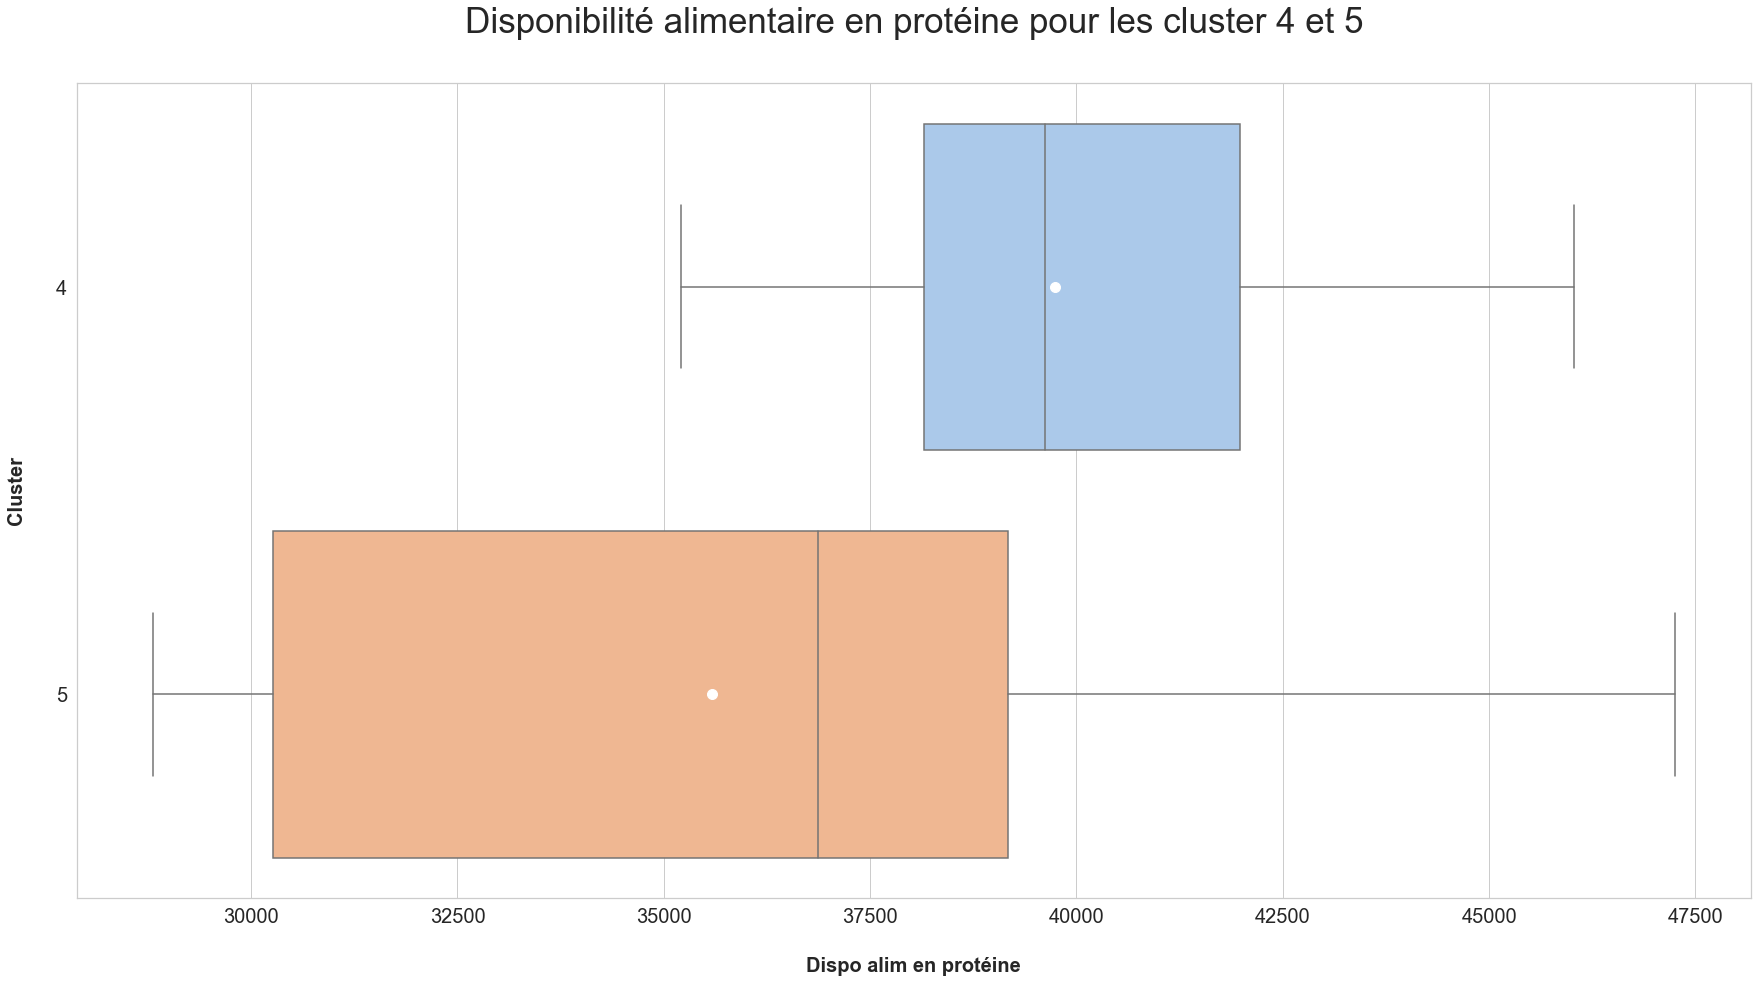

In [91]:
#boxplot
color = sns.color_palette('pastel')

plt.figure(figsize=(30,15)) 

sns.boxplot(data=c4c5[(c4c5["groupe_cah"]== 4) | (c4c5["groupe_cah"]== 5)], x='dispo_proteines', y='groupe_cah', orient='h', palette=color,
            fliersize=4 , showfliers=True, showmeans=True, meanprops={"marker":"o", 
                                                                      "markerfacecolor":"white",
                                                                      "markeredgecolor":"white", 
                                                                      "markersize":"10"})

plt.xlabel('Dispo alim en prot√©ine', fontsize=20, labelpad=30, fontweight='bold')
plt.xticks(fontsize=20)
plt.ylabel('Cluster', fontsize=20, labelpad=30, fontweight='bold')
plt.yticks(fontsize=20)
plt.title('Disponibilit√© alimentaire en prot√©ine pour les cluster 4 et 5', fontsize=35, pad=50)
plt.savefig("exports/Disponibilit√© alimentaire en prot√©ine pour les cluster 4 et 5.jpg")


plt.show()

### Tester l'√©galit√© de la variance

**H0 = Les variance sont √©gales .**

**H1 = Les variance ne sont pas √©gales.** 

In [92]:
#On teste tout d‚Äôabord l‚Äô√©galit√© des variances √† l‚Äôaide de la commande
pg.homoscedasticity(df_groupes_cah, dv='dispo_proteines',  group='groupe_cah', method='levene', 
                    alpha=0.05)
#Thomoscedasticity :tester l'√©galit√© de la variance.

W      pval  equal_var
levene  1.926049  0.109061       True

### Tester l'√©galit√© des moyennes

**H0 = Les moyennes sont √©gales .**

**H1 = Les moyennes ne sont pas √©gales.** 

In [93]:
#On teste ensuite l‚Äô√©galit√© des moyennes √† l‚Äôaide de la commande
pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 4],
         df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5],
         paired=False,
        
         confidence=0.95)

T      dof alternative     p-val              CI95%   cohen-d  \
T-test  1.90841  9.77339   two-sided  0.086109  [-711.7, 9025.16]  0.976943   

         BF10     power  
T-test  1.341  0.623401

In [94]:
Œ± = 0.05

if Œ± > pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 4],
             df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5]).iloc[0,3] : 
    
    print("La p-value √©tant inf√©rieure au risque Œ±, on rejette donc H0, les moyennes des deux groupes sont diff√©rentes.")
else :
    print("La p-value √©tant sup√©rieur au risque Œ±, H0 est donc vrai, les moyennes des deux groupes sont √©gales.")

La p-value √©tant sup√©rieur au risque Œ±, H0 est donc vrai, les moyennes des deux groupes sont √©gales.
